
<h2 style="text-align:center; background-color:#fdfbd4; color:black;padding:14px;"><b> Reddit LGBTQIA+ Community Sentiment Analysis - NLP and Clustering Project </b></h2>

---

<p style="text-align:right"><b> Project Creator: Flora Wong (Yuen Ling) </b></p>

### Project Goal :
This project aims at exploring sentiments of LGBTQIA+ Community in Reddit social media platform. 

Data Source: [Reddit - Social Medial Platform](https://www.reddit.com/) from the platform official API.

### The Dataset :
- 15 Subreddit LGBTQIA+ related channels:
    - r/lgbt
    - r/AskLGBT
    - r/lgbt_superheroes
    - r/LGBTeens
    - r/ainbow
    - r/LGBT_Muslims
    - r/LGBTnews
    - r/actuallesbians
    - r/BlackLGBT
    - r/gay
    - r/bisexual
    - r/gaybros
    - r/transgender
    - r/NonBinary
    - r/queer
<br></br>
- For each channel, 10 trending posts are extracted.
- Date of data retrieval: 15 November, 2024

### Notebook Content :
- [Part I - API Data Retrieval](#part-i---api-data-retrieval)
- [Part II - Data Cleaning + Preprocessing](#part-ii---data-cleaning--preprocessing)
- [Part III - Explorative Data Analysis](#part-iii---explorative-data-analysis)
- [Part IV - NLP Models + Sentiment Analysis](#part-iv---nlp-models--sentiment-analysis)
- [Part V - Unsupervised Clustering Model](#part-v---unsupervised-clustering-model)
- [Part VI - Summary and Reflection ](#part-vi---summary)

<br></br>

<h2 style="text-align:center; background-color:#fdfbd4; color:black; padding:5px;"><b>  Common Libraries in Notebook </b></h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style="text-align:center; background-color:#fdfbd4; color:black; padding:5px;"><b>  Part I - API Data Retrieval </b></h2><a id="part-i---api-data-retrieval"></a>

In [3]:
import praw
import time

In [5]:
# log in to the Reddit API 
# given of confidential personal information, orignial cell is removed.

#reddit = praw.Reddit(
    #client_id='confidential',         
    #client_secret='confidential', 
    #user_agent='confidential',
    #redirect_uri='confidential')

In [6]:
print(reddit.read_only)

True


In [7]:
# The 15 Subreddits related to LGBTQ2S+ Communities

subreddit_list = ['lgbt','AskLGBT','lgbt_superheroes','LGBTeens','ainbow',
              'LGBT_Muslims','LGBTnews','actuallesbians','BlackLGBT','bisexual',
              'gay','gaybros','transgender','NonBinary','queer']

In [8]:
all_comments_list = []
all_posts_list = []

# Loop through 15 subreddits
for subreddit_name in subreddit_list:
    print(f"Scraping posts from r/{subreddit_name}.")
    
    subreddit = reddit.subreddit(subreddit_name)
    top_posts = subreddit.top(limit=10)                    # Extract top 10 posts for each subreddit
    
    for post in top_posts:
        post_data = {
            'Title': post.title,
            'Author': post.author,
            'Subreddit': subreddit_name,
            'Score': post.score,
            'Creation Time': post.created_utc,             # Unix Time
            'Content': post.selftext,                      # an empty string will be returned if a link post.
            'Number of Comments': post.num_comments,
            'Upvote ratio': post.upvote_ratio,
            'Post id': post.id,
            'Flair': post.link_flair_text,                 # Tag used
            'Permalink': post.permalink, 
            'URL': post.url}

        post.comments.replace_more(limit=0)                # Extract all comments for each post
        comments = []
        
        for comment in post.comments.list():
            try:
                comments.append({
                    'Post ID': post.id,
                    'Comment ID': comment.id,
                    'Comment Author': comment.author,
                    'Comment Content': comment.body,
                    'Comment Score': comment.score,
                    'Comment Created Time': comment.created_utc})
            except:
                pass
                
        comments_df = pd.DataFrame(comments)  
        all_comments_list.append(comments_df)
        all_posts_list.append(pd.DataFrame([post_data]))
    
    time.sleep(2)

all_comments_df = pd.concat(all_comments_list, ignore_index=True)
all_posts_df = pd.concat(all_posts_list, ignore_index=True)

all_comments_df.to_csv('reddit_comments.csv', index=False)
all_posts_df.to_csv('reddit_posts.csv', index=False)


Scraping posts from r/lgbt.
Scraping posts from r/AskLGBT.
Scraping posts from r/lgbt_superheroes.
Scraping posts from r/LGBTeens.
Scraping posts from r/ainbow.
Scraping posts from r/LGBT_Muslims.
Scraping posts from r/LGBTnews.
Scraping posts from r/actuallesbians.
Scraping posts from r/BlackLGBT.
Scraping posts from r/bisexual.
Scraping posts from r/gay.
Scraping posts from r/gaybros.
Scraping posts from r/transgender.
Scraping posts from r/NonBinary.
Scraping posts from r/queer.


In [9]:
all_posts_df

Title              Author  \
0    My parents chose to not attend their only daug...           isabeljdt   
1    My Mum allowed me to put any flag on my wardro...            Chernyat   
2                                     Love David Bowie         Ry3nh0wells   
3    North Dakota's first openly lesbian official d...        NewCarthagea   
4                                  Magic Johnson's son                None   
..                                                 ...                 ...   
145  bought my first dress today! felt so elated i ...                None   
146             If you are queer and scared in the US   TamaleImpersonator   
147        Ironic Meme -- beware the new gender binary      snarkerposey11   
148          Pole dancing in one of my first dresses 🥰         _abelanimal   
149  Hi all, I’m Erl! I’m a cis-woman, masculine-of...           lenlennie   

    Subreddit  Score  Creation Time  Number of Comments  Upvote ratio  \
0        lgbt  95159   1.580498e+09                1320          0.85   
1        lgbt  54456   1.634371e+09                1567          0.82   
2        lgbt  42266   1.610387e+09                 483          0.91   
3        lgbt  40266   1.605194e+09                 841          0.92   
4        lgbt  40155   1.496496e+09                 733          0.71   
..        ...    ...            ...                 ...           ...   
145     queer    329   1.604807e+09                  16          1.00   
146     queer    324   1.731031e+09                  46          0.97   
147     queer    315   1.705740e+09                  42          0.97   
148     queer    304   1.641551e+09                  20          1.00   
149     queer    291   1.596640e+09                  27          0.99   

     Post id                Flair  \
0     ewt93j                 None   
1     q97h86         Art/Creative   
2     kv7nao         Art/Creative   
3     jswaqm                 None   
4     6f148h         Hello Reddit   
..       ...                  ...   
145   jq4rg7                 None   
146  1gm7gru  News/Current Events   
147  19b7bs6                 None   
148   ry4aua                 None   
149   i474qr                 None   

                                             Permalink  \
0    /r/lgbt/comments/ewt93j/my_parents_chose_to_no...   
1    /r/lgbt/comments/q97h86/my_mum_allowed_me_to_p...   
2            /r/lgbt/comments/kv7nao/love_david_bowie/   
3    /r/lgbt/comments/jswaqm/north_dakotas_first_op...   
4          /r/lgbt/comments/6f148h/magic_johnsons_son/   
..                                                 ...   
145  /r/queer/comments/jq4rg7/bought_my_first_dress...   
146  /r/queer/comments/1gm7gru/if_you_are_queer_and...   
147  /r/queer/comments/19b7bs6/ironic_meme_beware_t...   
148  /r/queer/comments/ry4aua/pole_dancing_in_one_o...   
149  /r/queer/comments/i474qr/hi_all_im_erl_im_a_ci...   

                                                   URL  
0                  https://i.redd.it/4wxvw0ivx5e41.jpg  
1                  https://i.redd.it/9834u49jprt71.jpg  
2                  https://i.redd.it/sexcpd1jpqa61.jpg  
3                      https://v.redd.it/lympnhjzrty51  
4                   https://i.redd.it/wxb4gccgjf1z.png  
..                                                 ...  
145              https://www.reddit.com/gallery/jq4rg7  
146  https://www.reddit.com/r/queer/comments/1gm7gr...  
147               https://i.redd.it/ldsjr3ic4kdc1.jpeg  
148                    https://v.redd.it/myagrcqcr8a81  
149                https://i.redd.it/refx6dmca7f51.jpg  

[150 rows x 11 columns]

In [10]:
all_comments_df

Post ID Comment ID       Comment Author  \
0      ewt93j    fg4agrq    VampireStereotype   
1      ewt93j    fg48yft                 None   
2      ewt93j    fg4cg63              5557ttr   
3      ewt93j    fg48xnp     KeepToTheShadows   
4      ewt93j    fg4dela                 None   
...       ...        ...                  ...   
28941  i474qr    g0jm5n3  OrdinaryApplication   
28942  i474qr    g0hlqta            lenlennie   
28943  i474qr    g0jnw2m            lenlennie   
28944  i474qr    g0hp4yl     waffle_penguin70   
28945  i474qr    g0lmo94  OrdinaryApplication   

                                         Comment Content  Comment Score  \
0      Well... A wedding is a celebration of love, so...           2484   
1                                              [removed]           2408   
2      This picture looks like it’s straight out of a...           1081   
3      Congratulations on your wedding! I hope it was...            282   
4                                              [deleted]            420   
...                                                  ...            ...   
28941                    i'm a libra, are we a match? :)              1   
28942  aww,hey if hugs are consented, sending you war...              3   
28943      👀libra and sagittarius == definitely a match!              2   
28944                              Yes ofc always 🥰 yayy              3   
28945       stars align for you and I!Have a nice day :)              1   

       Comment Created Time  
0              1.580500e+09  
1              1.580499e+09  
2              1.580501e+09  
3              1.580499e+09  
4              1.580501e+09  
...                     ...  
28941          1.596710e+09  
28942          1.596662e+09  
28943          1.596711e+09  
28944          1.596663e+09  
28945          1.596744e+09  

[28946 rows x 6 columns]

<h2 style="text-align:center; background-color:#fdfbd4; color:black; padding:5px;"><b>  Part II - Data Cleanning + Preprocessing </b></h2><a id="part-ii---data-cleaning--preprocessing"></a>

### 1. Data Type and Null Values

#### Dataset 1 - Top Posts

In [3]:
df = pd.read_csv('reddit_posts.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               150 non-null    object 
 1   Author              137 non-null    object 
 2   Subreddit           150 non-null    object 
 3   Score               150 non-null    int64  
 4   Creation Time       150 non-null    float64
 5   Content             25 non-null     object 
 6   Number of Comments  150 non-null    int64  
 7   Upvote ratio        150 non-null    float64
 8   Post id             150 non-null    object 
 9   Flair               83 non-null     object 
 10  Permalink           150 non-null    object 
 11  URL                 150 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 14.2+ KB


In [7]:
df[df['Content'].isnull()]  # None value in 'Content' represent pictures/video posted in the content

Title                Author  \
0    My parents chose to not attend their only daug...             isabeljdt   
1    My Mum allowed me to put any flag on my wardro...              Chernyat   
2                                     Love David Bowie           Ry3nh0wells   
3    North Dakota's first openly lesbian official d...          NewCarthagea   
4                                  Magic Johnson's son                   NaN   
..                                                 ...                   ...   
144           Drawing I made about queer friendship 💖💖  FearlessDirector9113   
145  bought my first dress today! felt so elated i ...                   NaN   
147        Ironic Meme -- beware the new gender binary        snarkerposey11   
148          Pole dancing in one of my first dresses 🥰           _abelanimal   
149  Hi all, I’m Erl! I’m a cis-woman, masculine-of...             lenlennie   

    Subreddit  Score  Creation Time Content  Number of Comments  Upvote ratio  \
0        lgbt  95160   1.580498e+09     NaN                1320          0.85   
1        lgbt  54450   1.634371e+09     NaN                1567          0.82   
2        lgbt  42262   1.610387e+09     NaN                 483          0.91   
3        lgbt  40268   1.605194e+09     NaN                 841          0.92   
4        lgbt  40156   1.496496e+09     NaN                 733          0.71   
..        ...    ...            ...     ...                 ...           ...   
144     queer    342   1.728964e+09     NaN                  21          1.00   
145     queer    333   1.604807e+09     NaN                  16          1.00   
147     queer    321   1.705740e+09     NaN                  42          0.97   
148     queer    301   1.641551e+09     NaN                  20          1.00   
149     queer    295   1.596640e+09     NaN                  27          0.99   

     Post id         Flair                                          Permalink  \
0     ewt93j           NaN  /r/lgbt/comments/ewt93j/my_parents_chose_to_no...   
1     q97h86  Art/Creative  /r/lgbt/comments/q97h86/my_mum_allowed_me_to_p...   
2     kv7nao  Art/Creative          /r/lgbt/comments/kv7nao/love_david_bowie/   
3     jswaqm           NaN  /r/lgbt/comments/jswaqm/north_dakotas_first_op...   
4     6f148h  Hello Reddit        /r/lgbt/comments/6f148h/magic_johnsons_son/   
..       ...           ...                                                ...   
144  1g3z1lu           NaN  /r/queer/comments/1g3z1lu/drawing_i_made_about...   
145   jq4rg7           NaN  /r/queer/comments/jq4rg7/bought_my_first_dress...   
147  19b7bs6           NaN  /r/queer/comments/19b7bs6/ironic_meme_beware_t...   
148   ry4aua           NaN  /r/queer/comments/ry4aua/pole_dancing_in_one_o...   
149   i474qr           NaN  /r/queer/comments/i474qr/hi_all_im_erl_im_a_ci...   

                                        URL  
0       https://i.redd.it/4wxvw0ivx5e41.jpg  
1       https://i.redd.it/9834u49jprt71.jpg  
2       https://i.redd.it/sexcpd1jpqa61.jpg  
3           https://v.redd.it/lympnhjzrty51  
4        https://i.redd.it/wxb4gccgjf1z.png  
..                                      ...  
144  https://www.reddit.com/gallery/1g3z1lu  
145   https://www.reddit.com/gallery/jq4rg7  
147    https://i.redd.it/ldsjr3ic4kdc1.jpeg  
148         https://v.redd.it/myagrcqcr8a81  
149     https://i.redd.it/refx6dmca7f51.jpg  

[125 rows x 12 columns]

In [9]:
df['Content'] = df['Content'].fillna('picture/video')

In [11]:
df['Author'] = df['Author'].astype(str)
df['Flair'] = df['Flair'].astype(str)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               150 non-null    object 
 1   Author              150 non-null    object 
 2   Subreddit           150 non-null    object 
 3   Score               150 non-null    int64  
 4   Creation Time       150 non-null    float64
 5   Content             150 non-null    object 
 6   Number of Comments  150 non-null    int64  
 7   Upvote ratio        150 non-null    float64
 8   Post id             150 non-null    object 
 9   Flair               150 non-null    object 
 10  Permalink           150 non-null    object 
 11  URL                 150 non-null    object 
dtypes: float64(2), int64(2), object(8)
memory usage: 14.2+ KB


#### Dataset 2 - Comments on Top Posts

In [15]:
df_cm = pd.read_csv('reddit_comments.csv')

In [17]:
df_cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28945 entries, 0 to 28944
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Post ID               28945 non-null  object 
 1   Comment ID            28945 non-null  object 
 2   Comment Author        23620 non-null  object 
 3   Comment Content       28945 non-null  object 
 4   Comment Score         28945 non-null  int64  
 5   Comment Created Time  28945 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ MB


In [19]:
df_cm['Comment Author'] = df_cm['Comment Author'].astype(str)

In [21]:
df_cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28945 entries, 0 to 28944
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Post ID               28945 non-null  object 
 1   Comment ID            28945 non-null  object 
 2   Comment Author        28945 non-null  object 
 3   Comment Content       28945 non-null  object 
 4   Comment Score         28945 non-null  int64  
 5   Comment Created Time  28945 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 1.3+ MB


In [23]:
df.head(2)

Title     Author Subreddit  \
0  My parents chose to not attend their only daug...  isabeljdt      lgbt   
1  My Mum allowed me to put any flag on my wardro...   Chernyat      lgbt   

   Score  Creation Time        Content  Number of Comments  Upvote ratio  \
0  95160   1.580498e+09  picture/video                1320          0.85   
1  54450   1.634371e+09  picture/video                1567          0.82   

  Post id         Flair                                          Permalink  \
0  ewt93j           nan  /r/lgbt/comments/ewt93j/my_parents_chose_to_no...   
1  q97h86  Art/Creative  /r/lgbt/comments/q97h86/my_mum_allowed_me_to_p...   

                                   URL  
0  https://i.redd.it/4wxvw0ivx5e41.jpg  
1  https://i.redd.it/9834u49jprt71.jpg

### 2. Human Readable Time

#### Dataset 1 - Top Posts

In [26]:
# Convert unix time to datatime 
df['Creation Time Readable'] = pd.to_datetime(df['Creation Time'], unit='s')
# Extract the year, month, date, and hour
df['Year'] = df['Creation Time Readable'].dt.year
df['Month'] = df['Creation Time Readable'].dt.month
df['Date'] = df['Creation Time Readable'].dt.day
df['Hour'] = df['Creation Time Readable'].dt.hour
df = df.drop('Creation Time',axis=1)

In [28]:
df.head(2)

Title     Author Subreddit  \
0  My parents chose to not attend their only daug...  isabeljdt      lgbt   
1  My Mum allowed me to put any flag on my wardro...   Chernyat      lgbt   

   Score        Content  Number of Comments  Upvote ratio Post id  \
0  95160  picture/video                1320          0.85  ewt93j   
1  54450  picture/video                1567          0.82  q97h86   

          Flair                                          Permalink  \
0           nan  /r/lgbt/comments/ewt93j/my_parents_chose_to_no...   
1  Art/Creative  /r/lgbt/comments/q97h86/my_mum_allowed_me_to_p...   

                                   URL Creation Time Readable  Year  Month  \
0  https://i.redd.it/4wxvw0ivx5e41.jpg    2020-01-31 19:09:53  2020      1   
1  https://i.redd.it/9834u49jprt71.jpg    2021-10-16 07:50:56  2021     10   

   Date  Hour  
0    31    19  
1    16     7

#### Dataset 2 - Comments on Top Posts

In [30]:
# Convert unix time to datatime 
df_cm['CM Time Readable'] = pd.to_datetime(df_cm['Comment Created Time'], unit='s')
# Extract the year, month, date, and hour
df_cm['CM Year'] = df_cm['CM Time Readable'].dt.year
df_cm['CM Month'] = df_cm['CM Time Readable'].dt.month
df_cm['CM Date'] = df_cm['CM Time Readable'].dt.day
df_cm['CM Hour'] = df_cm['CM Time Readable'].dt.hour
df_cm = df_cm.drop('Comment Created Time',axis=1)

In [32]:
df_cm.head(2)

Post ID Comment ID     Comment Author  \
0  ewt93j    fg4agrq  VampireStereotype   
1  ewt93j    fg48yft                nan   

                                     Comment Content  Comment Score  \
0  Well... A wedding is a celebration of love, so...           2482   
1                                          [removed]           2408   

     CM Time Readable  CM Year  CM Month  CM Date  CM Hour  
0 2020-01-31 19:39:56     2020         1       31       19  
1 2020-01-31 19:24:34     2020         1       31       19

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Title                   150 non-null    object        
 1   Author                  150 non-null    object        
 2   Subreddit               150 non-null    object        
 3   Score                   150 non-null    int64         
 4   Content                 150 non-null    object        
 5   Number of Comments      150 non-null    int64         
 6   Upvote ratio            150 non-null    float64       
 7   Post id                 150 non-null    object        
 8   Flair                   150 non-null    object        
 9   Permalink               150 non-null    object        
 10  URL                     150 non-null    object        
 11  Creation Time Readable  150 non-null    datetime64[ns]
 12  Year                    150 non-null    int32     

In [36]:
df_cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28945 entries, 0 to 28944
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Post ID           28945 non-null  object        
 1   Comment ID        28945 non-null  object        
 2   Comment Author    28945 non-null  object        
 3   Comment Content   28945 non-null  object        
 4   Comment Score     28945 non-null  int64         
 5   CM Time Readable  28945 non-null  datetime64[ns]
 6   CM Year           28945 non-null  int32         
 7   CM Month          28945 non-null  int32         
 8   CM Date           28945 non-null  int32         
 9   CM Hour           28945 non-null  int32         
dtypes: datetime64[ns](1), int32(4), int64(1), object(4)
memory usage: 1.8+ MB


<h2 style="text-align:center; background-color:#fdfbd4; color:black; padding:5px;"><b>  Part III - Explorative Data Analysis </b></h2><a id="part-iii---explorative-data-analysis"></a>

### 1. Time-Based EDA

#### Yearly Counts of Observations

In [39]:
post_counts_by_year = df.groupby('Year')['Post id'].count().reset_index()
post_counts_by_year.columns = ['Year', 'Post Count']

In [41]:
post_counts_by_year

Year  Post Count
0  2016           1
1  2017           6
2  2018           5
3  2019          24
4  2020          41
5  2021          26
6  2022           9
7  2023          12
8  2024          26

### 1.1. Count Plot -  Yearly Counts of Popular Posts

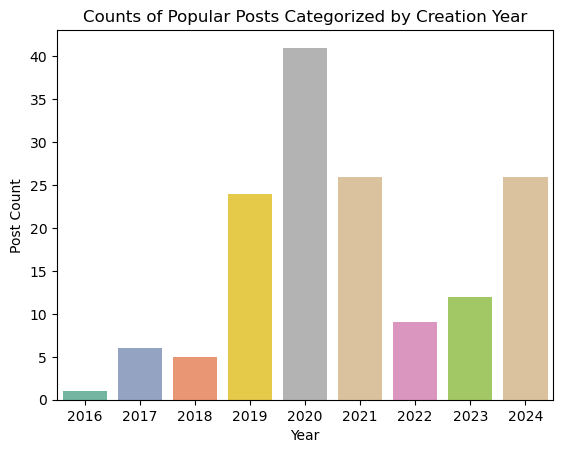

In [44]:
sns.barplot(post_counts_by_year,x='Year', y='Post Count', hue='Post Count', palette='Set2',legend=False)
plt.title("Counts of Popular Posts Categorized by Creation Year");

### 1.2. Count Plot -  Yearly Counts of Comments on Popular Posts

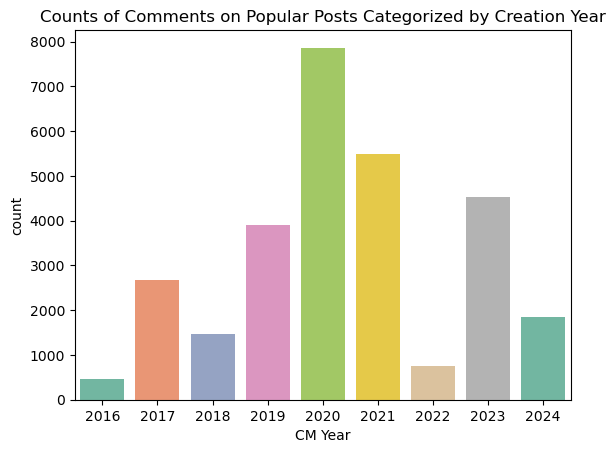

In [48]:
sns.countplot(df_cm,x='CM Year',hue='CM Year',palette='Set2',legend=False)
plt.title("Counts of Comments on Popular Posts Categorized by Creation Year");

### 1.3. Count Plot - Hourly Counts of Popular Posts

<Axes: xlabel='Hour', ylabel='count'>

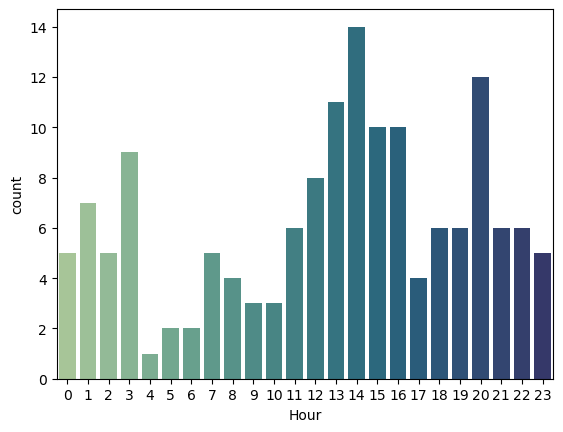

In [51]:
sns.countplot(df, x='Hour', hue='Hour', palette='crest',legend=False)

### 1.4. Count Plot - Hourly Counts of Comments on Popular Posts

<Axes: xlabel='CM Hour', ylabel='count'>

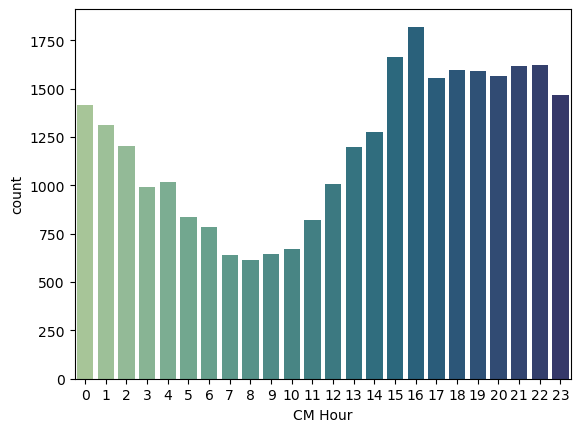

In [53]:
sns.countplot(df_cm, x='CM Hour', hue='CM Hour', palette='crest',legend=False)

### 2. Mean Scores (Net Upvotes)

### 2.1. Barplot - Yearly Mean Scores (Net Upvotes) of Popular Posts 

In [56]:
df.groupby('Year')['Score'].mean()

Year
2016     5732.000000
2017    28220.333333
2018    13200.000000
2019     5246.166667
2020    12387.902439
2021    13970.000000
2022     3084.888889
2023     5342.000000
2024     2187.192308
Name: Score, dtype: float64

<Axes: xlabel='Year', ylabel='Score'>

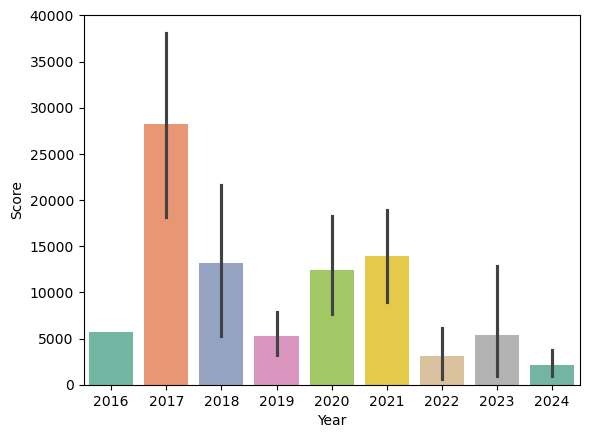

In [58]:
sns.barplot(data=df,y='Score',x='Year',hue='Year',palette='Set2',legend=False)

### 2.2. Barplot - Yearly Mean Scores (Net Upvotes) of Comments on Popular Posts

<Axes: xlabel='CM Year', ylabel='Comment Score'>

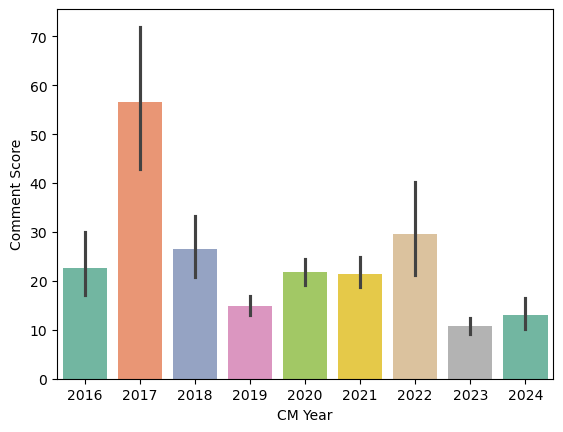

In [60]:
sns.barplot(data=df_cm,y='Comment Score',x='CM Year',hue='CM Year',palette='Set2',legend=False)

In [61]:
df.describe()

Score  Number of Comments  Upvote ratio  \
count    150.000000          150.000000    150.000000   
mean    9245.473333          283.040000      0.948200   
min      205.000000            0.000000      0.710000   
25%     1343.750000           47.250000      0.920000   
50%     4051.000000          131.000000      0.970000   
75%    10811.000000          375.000000      0.990000   
max    95160.000000         2639.000000      1.000000   
std    13499.201399          378.201659      0.061317   

              Creation Time Readable         Year       Month        Date  \
count                            150   150.000000  150.000000  150.000000   
mean      2021-04-30 21:15:28.060000  2020.853333    6.220000   15.933333   
min              2016-11-09 12:42:51  2016.000000    1.000000    1.000000   
25%    2020-02-06 00:04:46.750000128  2020.000000    3.000000    9.000000   
50%       2020-12-01 19:06:00.500000  2020.000000    6.000000   16.000000   
75%    2023-03-25 16:09:07.750000128  2022.750000   10.000000   24.000000   
max              2024-11-08 01:56:28  2024.000000   12.000000   31.000000   
std                              NaN     1.991211    3.521497    9.005343   

            Hour  
count  150.00000  
mean    12.72000  
min      0.00000  
25%      8.00000  
50%     14.00000  
75%     18.00000  
max     23.00000  
std      6.64146

In [64]:
df_cm.describe()

Comment Score               CM Time Readable       CM Year  \
count   28945.000000                          28945  28945.000000   
mean       22.169356  2020-11-28 15:39:51.290827264   2020.389394   
min      -170.000000            2016-11-09 13:59:58   2016.000000   
25%         1.000000            2019-10-18 18:46:06   2019.000000   
50%         3.000000            2020-10-15 06:55:32   2020.000000   
75%         9.000000            2021-11-24 03:33:48   2021.000000   
max     11853.000000            2024-11-11 00:34:48   2024.000000   
std       153.098838                            NaN      1.995210   

           CM Month       CM Date       CM Hour  
count  28945.000000  28945.000000  28945.000000  
mean       6.726205     16.832786     12.802211  
min        1.000000      1.000000      0.000000  
25%        4.000000     11.000000      6.000000  
50%        7.000000     17.000000     15.000000  
75%       10.000000     25.000000     19.000000  
max       12.000000     31.000000     23.000000  
std        3.428831      8.895714      7.224990

Insight:

- Among all popular posts, the mean upvote ratio is high (94.8%).

### 2.3. Barplot - Mean Scores (Net Upvotes) of Popular Posts Across Channels

In [67]:
subr_mean_score = df.groupby('Subreddit')['Score'].mean()
subr_mean_score_df = pd.DataFrame(subr_mean_score).sort_values(by='Score',ascending=False)
subr_mean_score_df

Score
Subreddit                
lgbt              46435.0
gaybros           26760.3
bisexual          21271.8
actuallesbians    11850.9
NonBinary          7668.7
gay                6813.8
ainbow             5460.0
LGBTeens           4055.3
lgbt_superheroes   2091.0
transgender        2082.9
LGBTnews           1932.8
AskLGBT            1348.2
queer               343.4
BlackLGBT           311.2
LGBT_Muslims        256.8

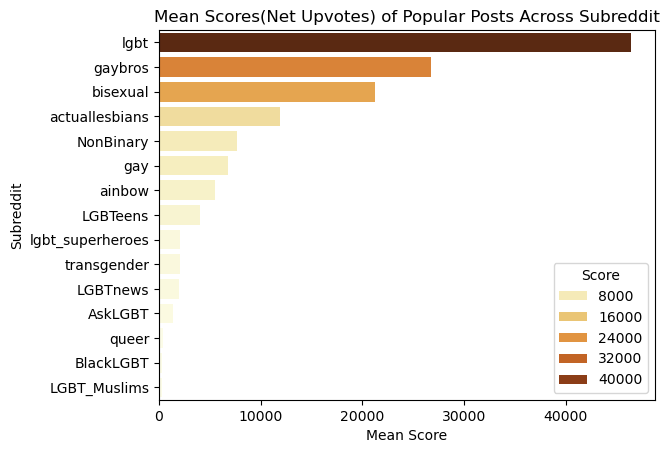

In [69]:
sns.barplot(subr_mean_score_df, y='Subreddit', x='Score', hue='Score',palette='YlOrBr')
plt.xlabel('Mean Score')
plt.title('Mean Scores(Net Upvotes) of Popular Posts Across Subreddit');

### Save cleaned DataFrames as csv files

In [76]:
df.to_csv('cleaned_reddit_posts_df.csv',index=False)
df_cm.to_csv('cleaned_reddit_comments_df.csv',index=False)

<h2 style="text-align:center; background-color:#fdfbd4; color:black; padding:5px;"><b>  Part IV -  NLP Models + Sentiment Analysis </b></h2><a id="part-iv---nlp-models--sentiment-analysis"></a>


This part has two major subparts:
1. **Polarity and subjectivity** Sentiment Analysis
2. **Complex Emotions** Classification Analysis
<br></br>

## 1. Polarity & Subjectivity Sentiment Analysis 

### 1.1. TextBlob Model

According to the documentation, TextBlob returns polarity and subjectivity of a sentence:
- **Polarity** :
  - returns a value between -1 and 1, where **-1 represent negative sentiment**, 0 is neutral, **1 is positive sentiment**.
  - its semantic labels help with fine-grained analysis. E.g. emoticons, exclamation mark, emojis, etc.
<br></br>
- **Subjectivity** :
  - returns value between 0 and 1, where **0 is objective** and **1 is subjective**.
  - quantifies the amount of personal opinion and factual information contained in the text.
  - the higher subjectivity means that the text contains personal opinion rather than factual information
<br></br>

In [3]:
from textblob import TextBlob

In [4]:
df = pd.read_csv('cleaned_reddit_posts_df.csv')
df_cm = pd.read_csv('cleaned_reddit_comments_df.csv')

In [6]:
# Create a function for easier use to get sentiment scores

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [9]:
# Create a function to classify the sentiment labels

def get_polarity_label(polarity_score):
    if polarity_score > 0:
        return 'Positive'
    elif polarity_score == 0:
        return 'Neutral'
    else:
        return 'Negative'

def get_subjectivity_label(subjectivity_score):
    if subjectivity_score > 0:
        return 'Subjective'
    elif subjectivity_score == 0:
        return 'Neutral'
    else:
        return 'Objective'

In [11]:
# create a new column containing both title and its content for each post

title_content_lst = []

for t, c in zip(df['Title'], df['Content']):
    if c != 'picture/video':                     # if content is not pic/video, then add content and title into the post list 
        title_content = c + t
        title_content_lst.append(title_content)
    else:                                       # if content is pic/video, then only add title into the post list
        title_content_lst.append(t)

df['Title_Content'] = title_content_lst

In [13]:
df.head(2)

Title     Author Subreddit  \
0  My parents chose to not attend their only daug...  isabeljdt      lgbt   
1  My Mum allowed me to put any flag on my wardro...   Chernyat      lgbt   

   Score        Content  Number of Comments  Upvote ratio Post id  \
0  95160  picture/video                1320          0.85  ewt93j   
1  54450  picture/video                1567          0.82  q97h86   

          Flair                                          Permalink  \
0           NaN  /r/lgbt/comments/ewt93j/my_parents_chose_to_no...   
1  Art/Creative  /r/lgbt/comments/q97h86/my_mum_allowed_me_to_p...   

                                   URL Creation Time Readable  Year  Month  \
0  https://i.redd.it/4wxvw0ivx5e41.jpg    2020-01-31 19:09:53  2020      1   
1  https://i.redd.it/9834u49jprt71.jpg    2021-10-16 07:50:56  2021     10   

   Date  Hour                                      Title_Content  
0    31    19  My parents chose to not attend their only daug...  
1    16     7  My Mum allowed me to put any flag on my wardro...

#### Classify Sentiment - Post One

In [16]:
df['Title_Content'][0]

'My parents chose to not attend their only daughter’s wedding and I couldn’t be happier. Sucks to be them!'

In [18]:
polarity_score_1 = get_polarity(df['Title_Content'][0])
subjectivity_score_1 = get_subjectivity(df['Title_Content'][0])

print(f'Polarity Score: {polarity_score_1}')
print(f'Subjectivity Score: {subjectivity_score_1}')


Polarity Score: -0.1875
Subjectivity Score: 0.65


In [20]:
polarity_label_1 = get_polarity_label(polarity_score_1)
subjectivity_label_1 = get_subjectivity_label(subjectivity_score_1)

print(f'Polarity Label: {polarity_label_1}')
print(f'Subjectivity Label: {subjectivity_label_1}')


Polarity Label: Negative
Subjectivity Label: Subjective


#### Classify Sentiment - All Posts

In [23]:
# Loop through all posts to get sentiments for each post
polarity_score_lst = []
subjectivity_score_lst = []
polarity_label_lst = []
subjectivity_label_lst = []

for post in df['Title_Content']:
    polarity_score = get_polarity(post)
    subjectivity_score = get_subjectivity(post)
    polarity_score_lst.append(polarity_score)
    subjectivity_score_lst.append(subjectivity_score)
    
    polarity_label = get_polarity_label(polarity_score)
    subjectivity_label = get_subjectivity_label(subjectivity_score)
    polarity_label_lst.append(polarity_label)
    subjectivity_label_lst.append(subjectivity_label)
    
# Create new columns to contain the results
df['Polarity Score']=polarity_score_lst
df['Subjectivity Score']=subjectivity_score_lst
df['Polarity Label']=polarity_label_lst
df['Subjectivity Label']=subjectivity_label_lst

In [25]:
df.head()

Title        Author Subreddit  \
0  My parents chose to not attend their only daug...     isabeljdt      lgbt   
1  My Mum allowed me to put any flag on my wardro...      Chernyat      lgbt   
2                                   Love David Bowie   Ry3nh0wells      lgbt   
3  North Dakota's first openly lesbian official d...  NewCarthagea      lgbt   
4                                Magic Johnson's son           NaN      lgbt   

   Score        Content  Number of Comments  Upvote ratio Post id  \
0  95160  picture/video                1320          0.85  ewt93j   
1  54450  picture/video                1567          0.82  q97h86   
2  42262  picture/video                 483          0.91  kv7nao   
3  40268  picture/video                 841          0.92  jswaqm   
4  40156  picture/video                 733          0.71  6f148h   

          Flair                                          Permalink  ...  \
0           NaN  /r/lgbt/comments/ewt93j/my_parents_chose_to_no...  ...   
1  Art/Creative  /r/lgbt/comments/q97h86/my_mum_allowed_me_to_p...  ...   
2  Art/Creative          /r/lgbt/comments/kv7nao/love_david_bowie/  ...   
3           NaN  /r/lgbt/comments/jswaqm/north_dakotas_first_op...  ...   
4  Hello Reddit        /r/lgbt/comments/6f148h/magic_johnsons_son/  ...   

  Creation Time Readable  Year  Month  Date  Hour  \
0    2020-01-31 19:09:53  2020      1    31    19   
1    2021-10-16 07:50:56  2021     10    16     7   
2    2021-01-11 17:41:37  2021      1    11    17   
3    2020-11-12 15:14:37  2020     11    12    15   
4    2017-06-03 13:12:03  2017      6     3    13   

                                       Title_Content Polarity Score  \
0  My parents chose to not attend their only daug...      -0.187500   
1  My Mum allowed me to put any flag on my wardro...       0.000000   
2                                   Love David Bowie       0.500000   
3  North Dakota's first openly lesbian official d...       0.178571   
4                                Magic Johnson's son       0.500000   

   Subjectivity Score  Polarity Label Subjectivity Label  
0            0.650000        Negative         Subjective  
1            0.000000         Neutral            Neutral  
2            0.600000        Positive         Subjective  
3            0.456349        Positive         Subjective  
4            1.000000        Positive         Subjective  

[5 rows x 21 columns]

#### Classify Sentiment - All Comments

In [28]:
# Loop through all comments to get sentiments for each comments
cm_polarity_score_lst = []
cm_subjectivity_score_lst = []
cm_polarity_label_lst = []
cm_subjectivity_label_lst = []

for comment in df_cm['Comment Content']:
    if comment != '[removed]':                         # exclude those [removed] comment
        polarity_score = get_polarity(comment)
        subjectivity_score = get_subjectivity(comment)
        cm_polarity_score_lst.append(polarity_score)
        cm_subjectivity_score_lst.append(subjectivity_score)
    
        polarity_label = get_polarity_label(polarity_score)
        subjectivity_label = get_subjectivity_label(subjectivity_score)
        cm_polarity_label_lst.append(polarity_label)
        cm_subjectivity_label_lst.append(subjectivity_label)
    else:
                                                        # Append None for [removed] comments
        cm_polarity_score_lst.append(None)
        cm_subjectivity_score_lst.append(None)
        cm_polarity_label_lst.append(None)
        cm_subjectivity_label_lst.append(None)

# Create new columns to contain the results
df_cm['Polarity Score']= cm_polarity_score_lst
df_cm['Subjectivity Score']= cm_subjectivity_score_lst
df_cm['Polarity Label']= cm_polarity_label_lst
df_cm['Subjectivity Label']= cm_subjectivity_label_lst

In [29]:
df_cm.head(2)

Post ID Comment ID     Comment Author  \
0  ewt93j    fg4agrq  VampireStereotype   
1  ewt93j    fg48yft                NaN   

                                     Comment Content  Comment Score  \
0  Well... A wedding is a celebration of love, so...           2482   
1                                          [removed]           2408   

      CM Time Readable  CM Year  CM Month  CM Date  CM Hour  Polarity Score  \
0  2020-01-31 19:39:56     2020         1       31       19        0.409091   
1  2020-01-31 19:24:34     2020         1       31       19             NaN   

   Subjectivity Score Polarity Label Subjectivity Label  
0                 0.6       Positive         Subjective  
1                 NaN           None               None

#### Save as csv. file

In [31]:
df.to_csv('reddit_posts_polarity_subjectivity.csv',index=False)
df_cm.to_csv('reddit_comments_polarity_subjectivity.csv',index=False)

In [47]:
df = pd.read_csv('reddit_posts_polarity_subjectivity.csv')
df_cm = pd.read_csv('reddit_comments_polarity_subjectivity.csv')

### 1.2. Polarity & Subjectivity Distribution + Visualization

### (1) Mean Polarity & Sibjectivity Score

In [49]:
mean_polarity = df['Polarity Score'].mean()
mean_subjectivity = df['Subjectivity Score'].mean()
print(f'Mean Polarity Score - Posts: {mean_polarity}')
print(f'Mean Subjectivity Score - Posts: {mean_subjectivity}')

Mean Polarity Score - Posts: 0.20785422005195375
Mean Subjectivity Score - Posts: 0.42161213769856687


In [51]:
cm_mean_polarity = df_cm['Polarity Score'].mean()
cm_mean_subjectivity = df_cm['Subjectivity Score'].mean()
print(f'Mean Polarity Score - Comments: {cm_mean_polarity}')
print(f'Mean Subjectivity Score - Comments: {cm_mean_subjectivity}')

Mean Polarity Score - Comments: 0.12803878364061047
Mean Subjectivity Score - Comments: 0.4222825059027653


### (2) Counts of Posts & Comments Based on Sentiment Labels

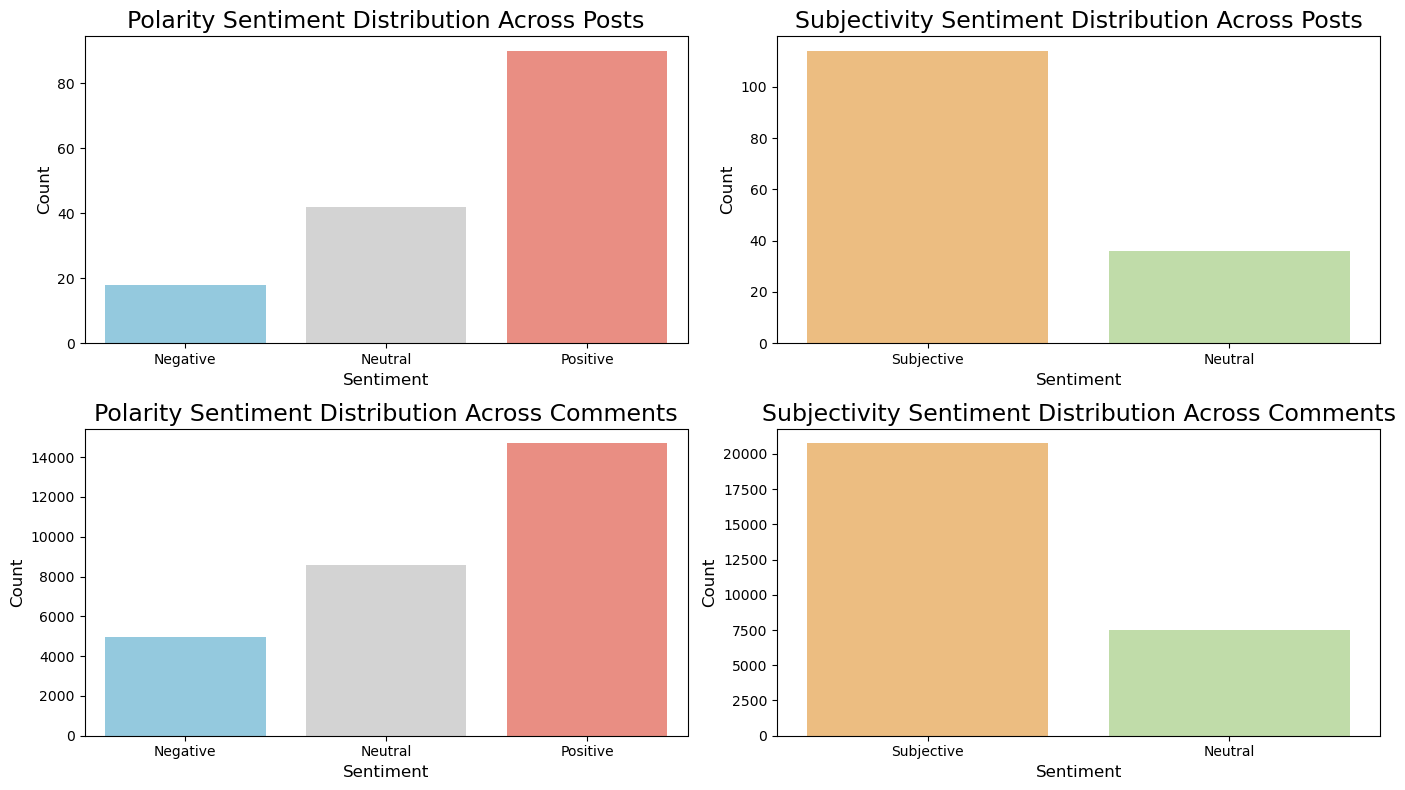

In [59]:
# Plots of Sentiment Distribution
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 8))

# Set palette
palette=['skyblue', 'lightgrey', 'salmon']
order=['Negative', 'Neutral', 'Positive']

# Polarity Sentiment Distribution - Posts
sns.countplot(ax=ax[0,0], x='Polarity Label', data=df, hue='Polarity Label', palette=palette, order=order)
ax[0,0].set_title('Polarity Sentiment Distribution Across Posts', fontsize=17)

# Subjectivity Sentiment Distribution - Posts
sns.countplot(ax=ax[0,1], x='Subjectivity Label', data=df, hue='Subjectivity Label', palette='Spectral')
ax[0,1].set_title('Subjectivity Sentiment Distribution Across Posts', fontsize=17)

# Polarity Sentiment Distribution - Comments
sns.countplot(ax=ax[1,0], x='Polarity Label', data=df_cm, hue='Polarity Label', palette=palette, hue_order=order, order=order, legend=None)
ax[1,0].set_title('Polarity Sentiment Distribution Across Comments', fontsize=17)

# Subjectivity Sentiment Distribution - Comments
sns.countplot(ax=ax[1,1], x='Subjectivity Label', data=df_cm, hue='Subjectivity Label', palette='Spectral', legend=None)
ax[1,1].set_title('Subjectivity Sentiment Distribution Across Comments', fontsize=17)

# Same labels
for axis in ax.flat:
    axis.set_xlabel('Sentiment', fontsize=12)
    axis.set_ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Insight:

- Among all popular posts and their comments, the majority of them are positive and subject.
<br></br>

### (3) Yearly Distribution of Sentiment Scores

In [94]:
# Yearly Mean Sentiment Scores
yearly_mean_polarity = pd.DataFrame(df.groupby('Year')['Polarity Score'].mean())
yearly_mean_subjectivity = pd.DataFrame(df.groupby('Year')['Subjectivity Score'].mean())
cm_yearly_mean_polarity = pd.DataFrame(df_cm.groupby('CM Year')['Polarity Score'].mean())
cm_yearly_mean_subjectivity = pd.DataFrame(df_cm.groupby('CM Year')['Subjectivity Score'].mean())
post_comments_yearly_sentiment = pd.concat([yearly_mean_polarity, cm_yearly_mean_polarity, yearly_mean_subjectivity,cm_yearly_mean_subjectivity],axis=1)
post_comments_yearly_sentiment.columns = ['Posts_Yrly_Mean Polarity', 'Comments_Yrly_Mean Polarity','Posts_Yrly_Mean Subjectivity','Comments_Yrly_Mean Subjectivity']
post_comments_yearly_sentiment

Posts_Yrly_Mean Polarity  Comments_Yrly_Mean Polarity  \
2016                  0.109572                     0.078529   
2017                  0.246528                     0.128788   
2018                  0.492222                     0.110515   
2019                  0.155920                     0.084858   
2020                  0.251934                     0.160716   
2021                  0.229766                     0.146450   
2022                  0.134410                     0.151392   
2023                  0.093861                     0.090727   
2024                  0.182576                     0.129595   

      Posts_Yrly_Mean Subjectivity  Comments_Yrly_Mean Subjectivity  
2016                      0.600337                         0.420415  
2017                      0.417361                         0.405286  
2018                      0.571111                         0.399983  
2019                      0.347685                         0.390837  
2020                      0.436658                         0.448722  
2021                      0.448400                         0.412133  
2022                      0.521952                         0.440579  
2023                      0.418053                         0.441466  
2024                      0.371604                         0.393674

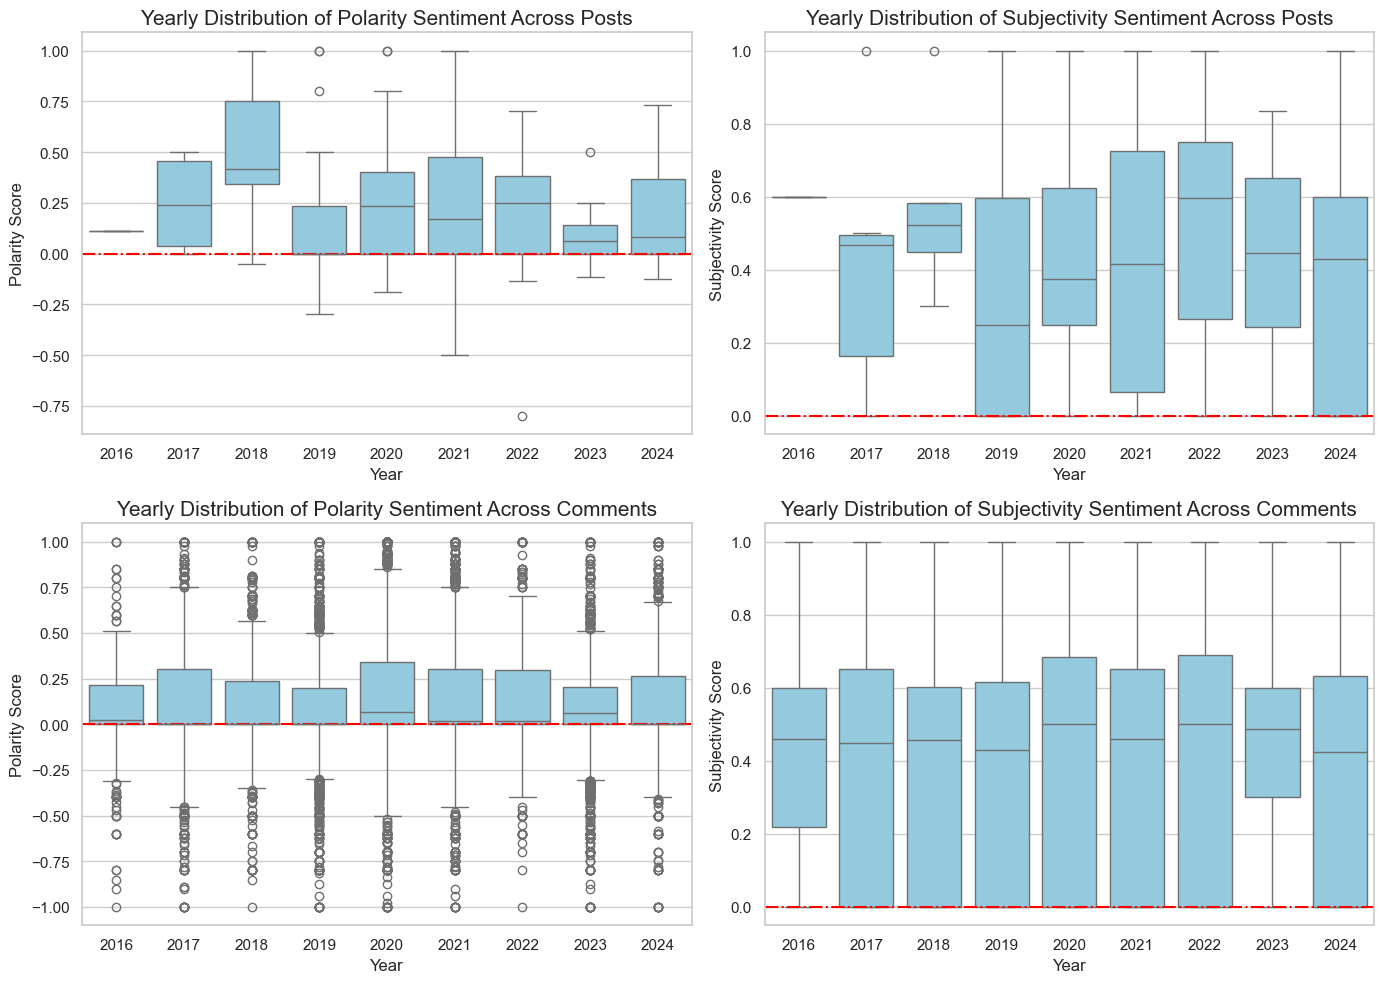

In [105]:
# Plots of Yearly Distribution of Sentiments
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

sns.boxplot(ax=ax[0,0], x='Year',y='Polarity Score', data=df, color='skyblue')
ax[0,0].set_title('Yearly Distribution of Polarity Sentiment Across Posts', fontsize=15)
ax[0,0].set_ylabel('Polarity Score', fontsize=12)

sns.boxplot(ax=ax[0,1], x='Year',y='Subjectivity Score', data=df, color='skyblue')
ax[0,1].set_title('Yearly Distribution of Subjectivity Sentiment Across Posts', fontsize=15)
ax[0,1].set_ylabel('Subjectivity Score', fontsize=12)

sns.boxplot(ax=ax[1,0], x='CM Year',y='Polarity Score', data=df_cm, color='skyblue')
ax[1,0].set_title('Yearly Distribution of Polarity Sentiment Across Comments', fontsize=15)
ax[1,0].set_ylabel('Polarity Score', fontsize=12)

sns.boxplot(ax=ax[1,1], x='CM Year',y='Subjectivity Score', data=df_cm, color='skyblue')
ax[1,1].set_title('Yearly Distribution of Subjectivity Sentiment Across Comments', fontsize=15)
ax[1,1].set_ylabel('Subjectivity Score', fontsize=12)

for axis in ax.flat:
    axis.set_xlabel('Year',fontsize=12)
    axis.axhline(y=0, color='red', linestyle='dashdot')

plt.tight_layout()
plt.show()

Insights:
- Across years between 2016-2024, the majority of popular posts and comments are positive and subjective.
- Comments are more widely spread throughout the spectrum of polarity (negativity and positivit) then posts.

### (4) Monthly Distribution of Sentiments in 2024

In [99]:
df_2024 = df[df['Year']==2024]
df_cm_2024 = df_cm[df_cm['CM Year']==2024]

In [101]:
mthly_mean_polarity = pd.DataFrame(df_2024.groupby('Month')['Polarity Score'].mean())
mthly_mean_subjectivity = pd.DataFrame(df_2024.groupby('Month')['Subjectivity Score'].mean())
cm_mthly_mean_polarity = pd.DataFrame(df_cm_2024.groupby('CM Month')['Polarity Score'].mean())
cm_mthly_mean_subjectivity = pd.DataFrame(df_cm_2024.groupby('CM Month')['Subjectivity Score'].mean())
post_comments_mthly_sentiment = pd.concat([mthly_mean_polarity, cm_mthly_mean_polarity, mthly_mean_subjectivity,cm_mthly_mean_subjectivity],axis=1)
post_comments_mthly_sentiment.columns = ['Posts_Mthly_Mean Polarity', 'Comments_Mthly_Mean Polarity','Posts_Mthly_Mean Subjectivity','Comments_Mthly_Mean Subjectivity']
post_comments_mthly_sentiment = post_comments_mthly_sentiment.sort_index()
post_comments_mthly_sentiment

Posts_Mthly_Mean Polarity  Comments_Mthly_Mean Polarity  \
1                    0.361616                      0.101810   
2                    0.000000                      0.074420   
3                    0.037500                      0.095796   
4                         NaN                      0.097156   
5                         NaN                      0.164343   
6                    0.734375                      0.064986   
7                    0.211458                      0.219420   
8                    0.266742                      0.152728   
9                    0.179167                      0.112757   
10                   0.091667                      0.224956   
11                   0.011949                      0.132946   

    Posts_Mthly_Mean Subjectivity  Comments_Mthly_Mean Subjectivity  
1                        0.620202                          0.447795  
2                        0.000000                          0.387581  
3                        0.112500                          0.348431  
4                             NaN                          0.502249  
5                             NaN                          0.437209  
6                        0.875000                          0.348719  
7                        0.431250                          0.456897  
8                        0.526869                          0.419699  
9                        0.383333                          0.323183  
10                       0.088889                          0.443712  
11                       0.404056                          0.396653

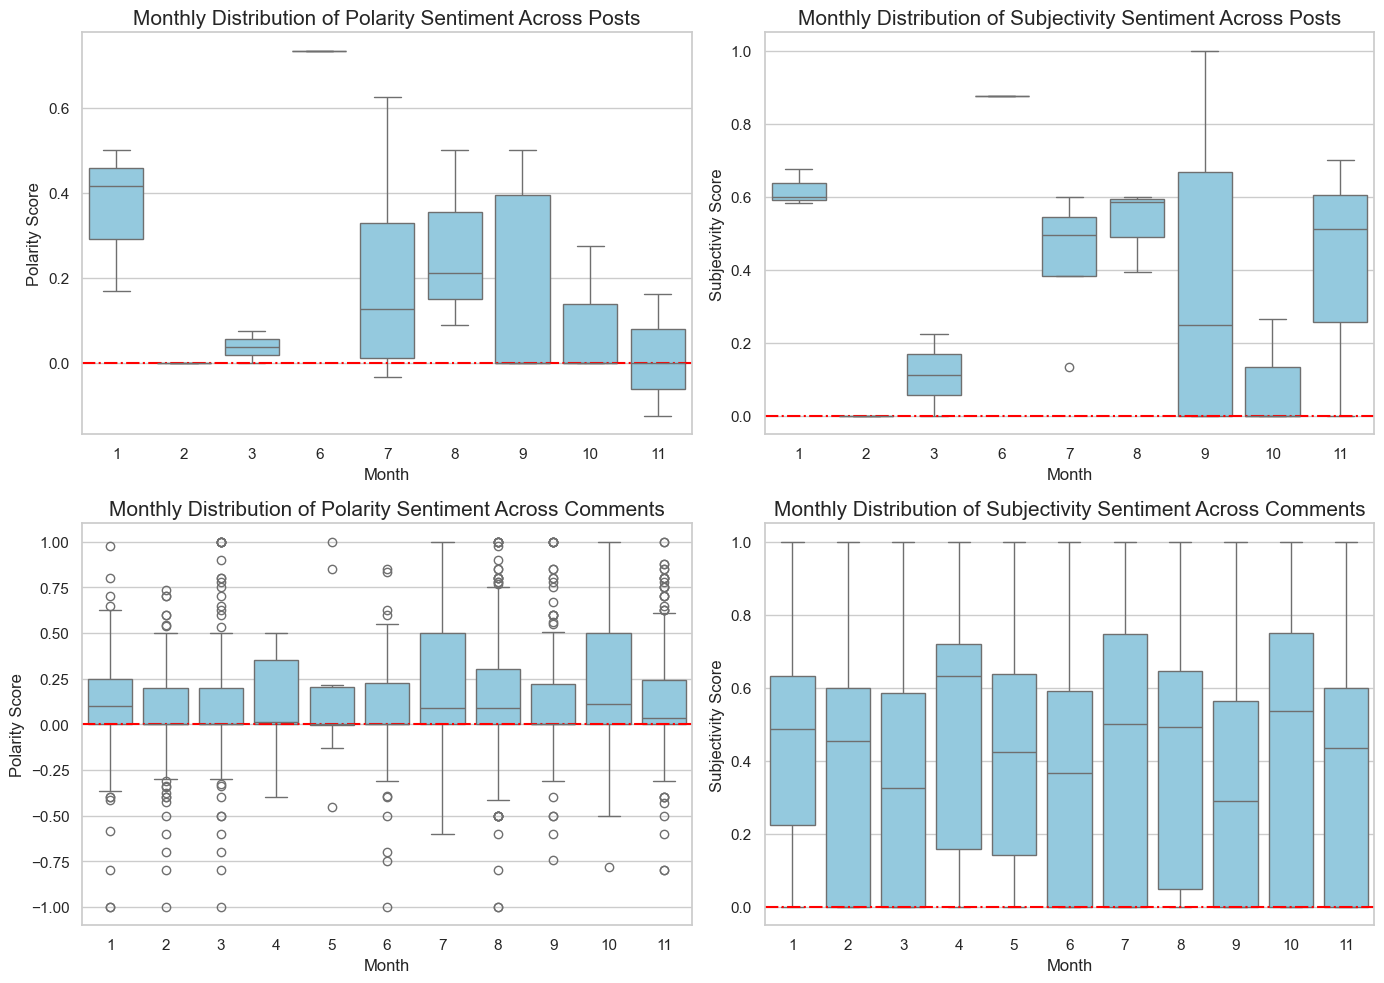

In [117]:
# Plots of Monthly Distribution of Sentiment in 2024
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14,10))

sns.boxplot(ax=ax[0,0], x='Month',y='Polarity Score', data=df_2024, color='skyblue')
ax[0,0].set_title('Monthly Distribution of Polarity Sentiment Across Posts', fontsize=15)
ax[0,0].set_ylabel('Polarity Score', fontsize=12)

sns.boxplot(ax=ax[0,1], x='Month',y='Subjectivity Score', data=df_2024, color='skyblue')
ax[0,1].set_title('Monthly Distribution of Subjectivity Sentiment Across Posts', fontsize=15)
ax[0,1].set_ylabel('Subjectivity Score', fontsize=12)

sns.boxplot(ax=ax[1,0], x='CM Month',y='Polarity Score', data=df_cm_2024, color='skyblue')
ax[1,0].set_title('Monthly Distribution of Polarity Sentiment Across Comments', fontsize=15)
ax[1,0].set_ylabel('Polarity Score', fontsize=12)

sns.boxplot(ax=ax[1,1], x='CM Month',y='Subjectivity Score', data=df_cm_2024, color='skyblue')
ax[1,1].set_title('Monthly Distribution of Subjectivity Sentiment Across Comments', fontsize=15)
ax[1,1].set_ylabel('Subjectivity Score', fontsize=12)

for axis in ax.flat:
    axis.set_xlabel('Month',fontsize=12)
    axis.axhline(y=0, color='red', linestyle='dashdot')

plt.tight_layout()
plt.show()

### (5) Monthly Distribution of Polarity Sentiments in Years (2021-2024)

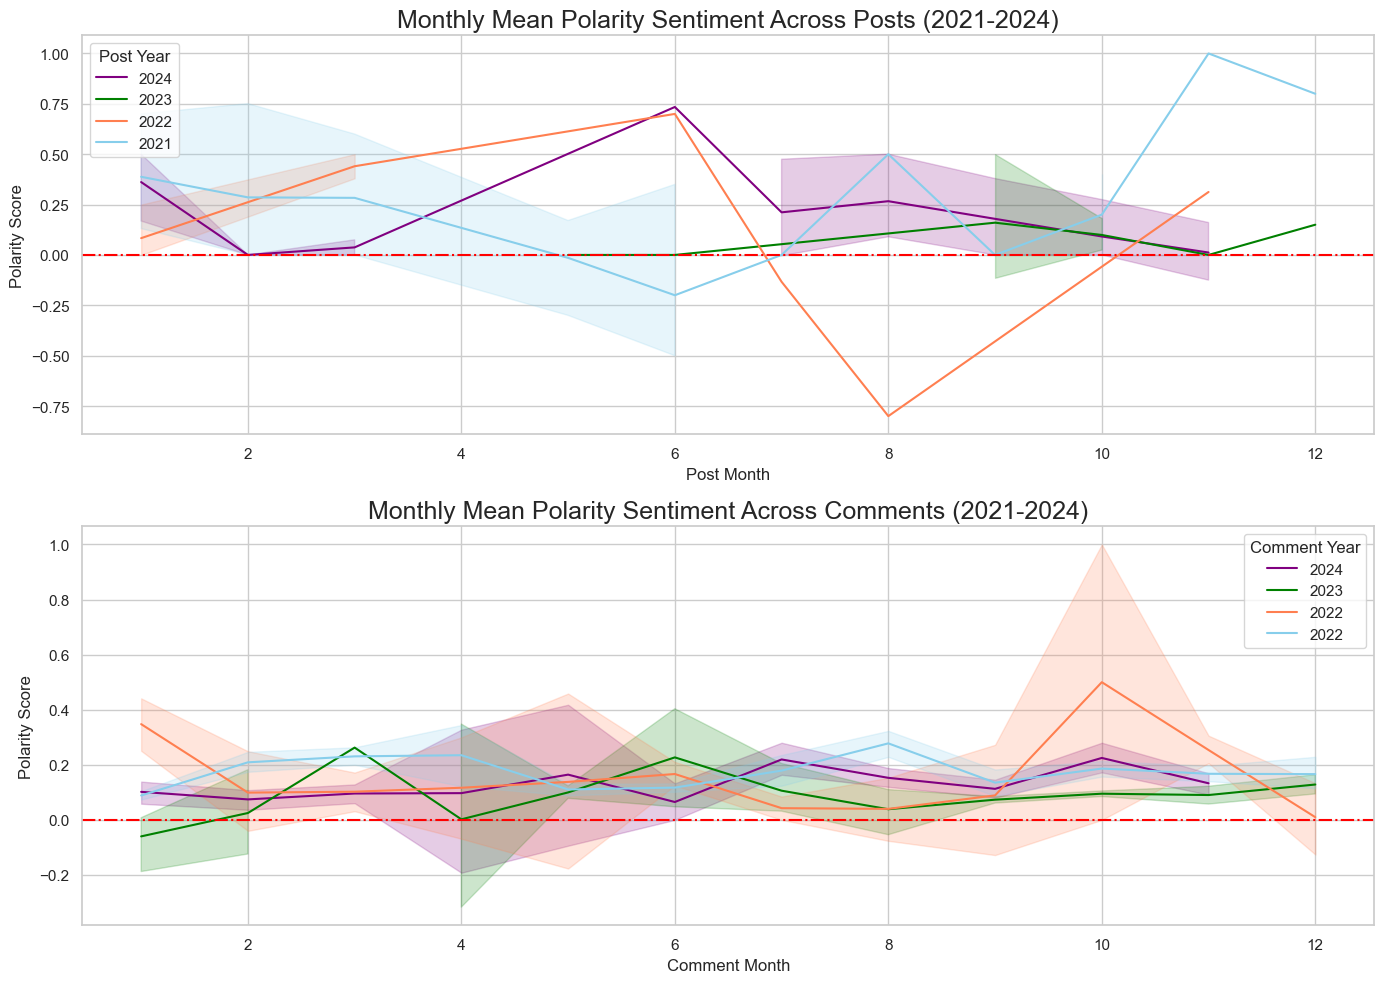

In [119]:
# Plots of Sentiment Distribution of Monthly Mean Sentiment
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,10))

sns.lineplot(ax=ax[0], x='Month',y='Polarity Score', data=(df[df['Year']==2024]), color='purple', label='2024')
sns.lineplot(ax=ax[0], x='Month',y='Polarity Score', data=(df[df['Year']==2023]), color='green', label='2023')
sns.lineplot(ax=ax[0], x='Month',y='Polarity Score', data=(df[df['Year']==2022]), color='coral', label='2022')
sns.lineplot(ax=ax[0], x='Month',y='Polarity Score', data=(df[df['Year']==2021]), color='skyblue', label='2021')
ax[0].set_title('Monthly Mean Polarity Sentiment Across Posts (2021-2024)', fontsize=18)
ax[0].set_ylabel('Polarity Score', fontsize=12)
ax[0].legend(title='Post Year')
ax[0].set_xlabel('Post Month',fontsize=12)

sns.lineplot(ax=ax[1], x='CM Month',y='Polarity Score', data=(df_cm[df_cm['CM Year']==2024]), color='purple',label='2024')
sns.lineplot(ax=ax[1], x='CM Month',y='Polarity Score', data=(df_cm[df_cm['CM Year']==2023]), color='green',label='2023')
sns.lineplot(ax=ax[1], x='CM Month',y='Polarity Score', data=(df_cm[df_cm['CM Year']==2022]), color='coral',label='2022')
sns.lineplot(ax=ax[1], x='CM Month',y='Polarity Score', data=(df_cm[df_cm['CM Year']==2021]), color='skyblue',label='2022')
ax[1].set_title('Monthly Mean Polarity Sentiment Across Comments (2021-2024)', fontsize=18)
ax[1].set_ylabel('Polarity Score', fontsize=12)
ax[1].legend(title='Comment Year')
ax[1].set_xlabel('Comment Month',fontsize=12)

for axis in ax:
    axis.axhline(y=0, color='red', linestyle='dashdot')

plt.tight_layout()
plt.show()

### (6) Hourly Distribution of Polarity Sentiments in 2024

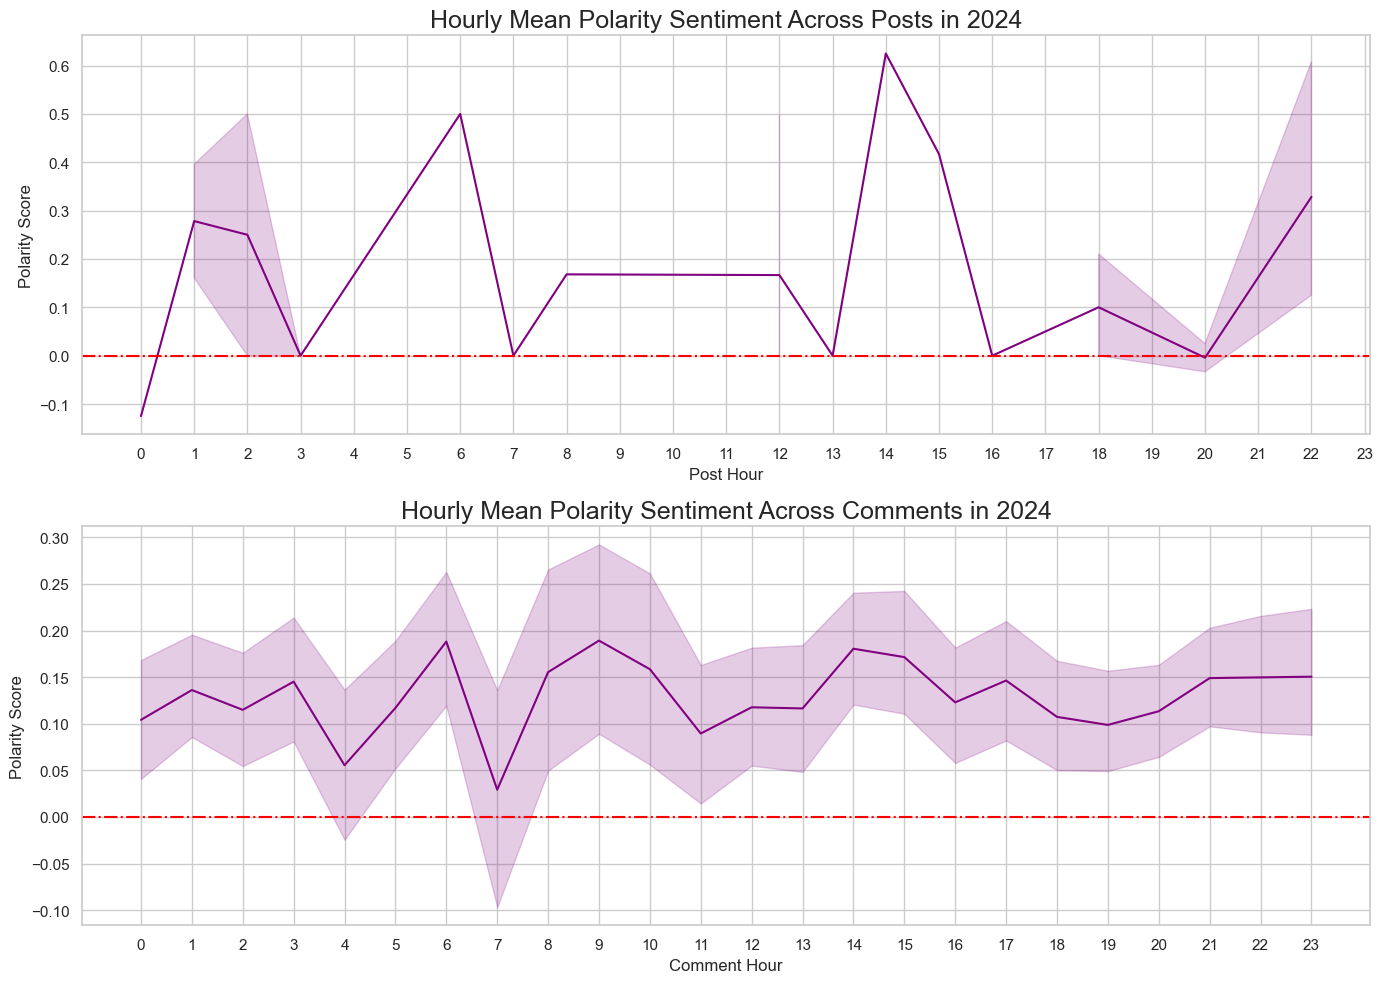

In [121]:
# Plots of Sentiment Distribution of Hourly Mean Sentiment
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(14,10))

sns.lineplot(ax=ax[0], x='Hour',y='Polarity Score', data=(df[df['Year']==2024]), color='purple')
ax[0].set_title('Hourly Mean Polarity Sentiment Across Posts in 2024', fontsize=18)
ax[0].set_ylabel('Polarity Score', fontsize=12)
ax[0].set_xlabel('Post Hour',fontsize=12)

sns.lineplot(ax=ax[1], x='CM Hour',y='Polarity Score', data=(df_cm[df_cm['CM Year']==2024]), color='purple')
ax[1].set_title('Hourly Mean Polarity Sentiment Across Comments in 2024', fontsize=18)
ax[1].set_ylabel('Polarity Score', fontsize=12)
ax[1].set_xlabel('Comment Hour',fontsize=12)

for axis in ax:
    axis.set_xticks(range(0, 24))
    axis.axhline(y=0, color='red', linestyle='dashdot')

plt.tight_layout()
plt.show()

### (7) Common Words Among Postive & Negative Posts

In [37]:
# Check value xounts for polarity score among posts and comments
p_df = df[df['Polarity Label']== 'Positive']
n_df = df[df['Polarity Label']== 'Negative']

p_df_cm = df_cm[df_cm['Polarity Label']== 'Positive']
n_df_cm = df_cm[df_cm['Polarity Label']== 'Negative']

print(p_df['Polarity Score'].value_counts(normalize=True))
print(n_df['Polarity Score'].value_counts(normalize=True))

print(p_df_cm['Polarity Score'].value_counts(normalize=True))
print(n_df_cm['Polarity Score'].value_counts(normalize=True))

Polarity Score
0.500000    0.122222
1.000000    0.088889
0.250000    0.066667
0.200000    0.055556
0.416667    0.044444
0.312500    0.033333
0.800000    0.033333
0.090000    0.022222
0.600000    0.022222
0.625000    0.022222
0.400000    0.022222
0.350000    0.022222
0.750000    0.022222
0.400000    0.011111
0.210227    0.011111
0.395833    0.011111
0.008333    0.011111
0.216667    0.011111
0.168182    0.011111
0.160847    0.011111
0.142857    0.011111
0.100000    0.011111
0.333333    0.011111
0.145833    0.011111
0.343750    0.011111
0.380519    0.011111
0.225000    0.011111
0.075000    0.011111
0.390625    0.011111
0.229167    0.011111
0.214286    0.011111
0.700000    0.011111
0.281250    0.011111
0.234549    0.011111
0.135648    0.011111
0.104694    0.011111
0.081614    0.011111
0.093631    0.011111
0.042788    0.011111
0.275000    0.011111
0.734375    0.011111
0.025000    0.011111
0.150000    0.011111
0.288571    0.011111
0.016667    0.011111
0.109572    0.011111
0.344444    0.01111

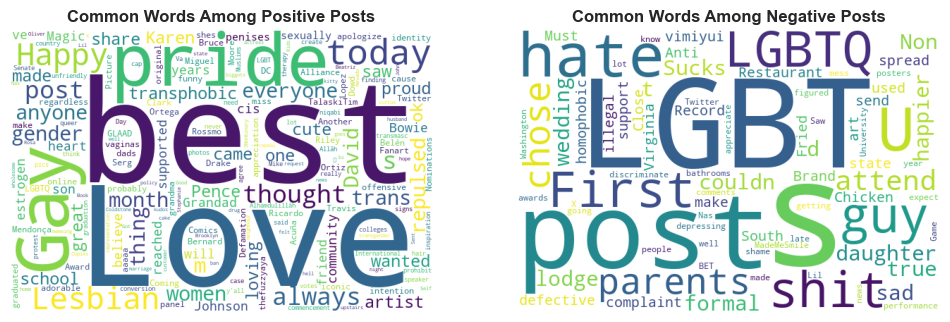

In [39]:
from wordcloud import WordCloud

most_positive = df[df['Polarity Score'].between(0.4,1)]['Title_Content']
most_negative = df[df['Polarity Score'].between(-1,-0.15)]['Title_Content']

most_positive_text = ' '.join(most_positive)
most_negative_text = ' '.join(most_negative)

pwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(most_positive_text)
nwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(most_negative_text)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.title('Common Words Among Positive Posts',fontsize=12,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Negative Posts',fontsize=12,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

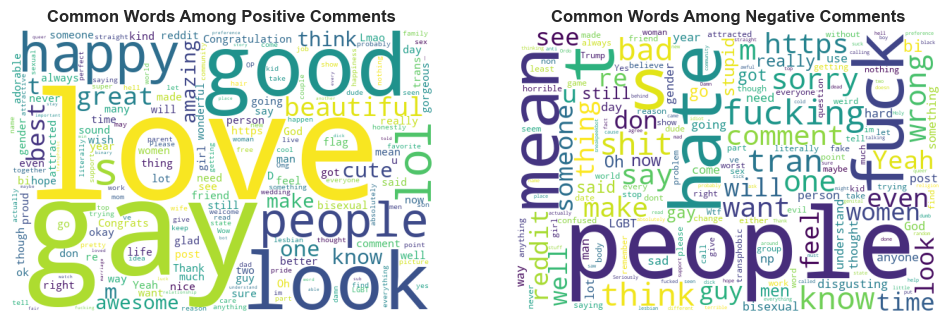

In [41]:
most_positive_cm = df_cm[df_cm['Polarity Score'].between(0.4,1)]['Comment Content']
most_negative_cm = df_cm[df_cm['Polarity Score'].between(-1,-0.2)]['Comment Content']

most_positive_text_cm = ' '.join(most_positive_cm)
most_negative_text_cm = ' '.join(most_negative_cm)

pwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(most_positive_text_cm)
nwc = WordCloud(width=600,height=400,collocations = False,background_color='white').generate(most_negative_text_cm)

plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.title('Common Words Among Positive Comments',fontsize=12,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Negative Comments',fontsize=12,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()

## 2. Complex Emotions Classification Analysis 

In [110]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


### 2.1. Pre-trained RoBERTa Model (from Hugging Face)

- Use a pre-trained NLP model (Sentiment Classifier) from Hugging Face
- Explore the model by trying out 2 methods of using and transforming the model, including :
  - Method 1: loading the model directly
  - Method 2: loading pipeline
- Try out classifiying the first title and see the results, and then will choose a suitable method to classifier all other contents.
<br></br>

### (1) Load Model

In [112]:
# Load model directly
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

print(model)
print(tokenizer)
print(model.config)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
         

In [114]:
tokenizer.model_max_length

512

In [116]:
# Sentiment Labels 
id2label = model.config.id2label
id2label 

{0: 'admiration',
 1: 'amusement',
 2: 'anger',
 3: 'annoyance',
 4: 'approval',
 5: 'caring',
 6: 'confusion',
 7: 'curiosity',
 8: 'desire',
 9: 'disappointment',
 10: 'disapproval',
 11: 'disgust',
 12: 'embarrassment',
 13: 'excitement',
 14: 'fear',
 15: 'gratitude',
 16: 'grief',
 17: 'joy',
 18: 'love',
 19: 'nervousness',
 20: 'optimism',
 21: 'pride',
 22: 'realization',
 23: 'relief',
 24: 'remorse',
 25: 'sadness',
 26: 'surprise',
 27: 'neutral'}

- According to the official documentation, it is a model with multi-label output and with each label being an independent binary classification. 
- The model will predict the probability of independent binary class of each label among the 28 labels.

### (2) Classify Emotions for First title 

In [119]:
df['Title'][0]

'My parents chose to not attend their only daughter’s wedding and I couldn’t be happier. Sucks to be them!'

In [121]:
token_title_1 = tokenizer.encode(df['Title'][0], return_tensors='pt') 
token_title_1 

tensor([[    0,  2387,  1041,  4689,     7,    45,  2725,    49,   129,  1354,
            17,    27,    29,  3312,     8,    38,  1705,    17,    27,    90,
            28, 16265,     4,   208, 19667,     7,    28,   106,   328,     2]])

In [123]:
result_title_1 = model(token_title_1)
result_title_1.logits                       # multiple logits (one per class)

tensor([[-4.8470, -5.7364, -4.4254, -2.6614, -4.4855, -5.8641, -6.5429, -6.3725,
         -6.0708, -0.6464, -4.1445, -5.3840, -5.0563, -5.4815, -7.0443, -6.3573,
         -4.9368, -2.6914, -5.4096, -5.6333, -6.7394, -6.4454, -4.3886, -5.0468,
         -5.0642, -0.5407, -6.0805, -2.8270]], grad_fn=<AddmmBackward0>)

In [124]:
from torch.nn.functional import sigmoid    # sigmoid - each class is treated independently

probabilities = torch.sigmoid(result_title_1.logits)    # transforms each logit into an independent probability

In [127]:
probabilities  # return a batch of 28 class probabilities

tensor([[0.0078, 0.0032, 0.0118, 0.0653, 0.0111, 0.0028, 0.0014, 0.0017, 0.0023,
         0.3438, 0.0156, 0.0046, 0.0063, 0.0041, 0.0009, 0.0017, 0.0071, 0.0635,
         0.0045, 0.0036, 0.0012, 0.0016, 0.0123, 0.0064, 0.0063, 0.3680, 0.0023,
         0.0559]], grad_fn=<SigmoidBackward0>)

#### Top emotion for the first title

In [130]:
max_prob_index = int(torch.argmax(probabilities))  
max_prob_index

25

In [132]:
max_prob_score = probabilities[0, max_prob_index].item()
max_prob_score

0.36803102493286133

In [134]:
max_prob_label = id2label.get(max_prob_index)
max_prob_label

'sadness'

In [136]:
print(f"Predicted index: {max_prob_index}")
print(f"Predicted label: {max_prob_label}")
print(f"Predicted label: {max_prob_score}")

Predicted index: 25
Predicted label: sadness
Predicted label: 0.36803102493286133


#### Top 3 Emotions for the first title

In [139]:
# get top 3 probabilities and their indices
top_probabilities, top_indices = torch.topk(probabilities, 3)

top_probabilities = top_probabilities.squeeze().tolist()
top_indices = top_indices.squeeze().tolist()
top_labels = [id2label[index] for index in top_indices]

print("Top 3 probabilities:", top_probabilities)
print("Top 3 class indices:", top_indices)
print("Top 3 class labels:", top_labels)

Top 3 probabilities: [0.36803102493286133, 0.3437979221343994, 0.06529261916875839]
Top 3 class indices: [25, 9, 3]
Top 3 class labels: ['sadness', 'disappointment', 'annoyance']


### (3) Classify Emotions For All Titles

#### Create Function For Easier Trasformation

In [141]:
def sentiment_label(t):
    tokens = tokenizer.encode(t, return_tensors='pt', max_length=512, truncation=True)    # set Max.token, cut off exceeding text
    result = model(tokens)
    probabilities = torch.sigmoid(result.logits)
    top_probabilities, top_indices = torch.topk(probabilities, 3)
    top_probabilities = top_probabilities.squeeze().tolist()
    top_indices = top_indices.squeeze().tolist()
    top_labels = [id2label[index] for index in top_indices]
    return top_probabilities, top_indices, top_labels

In [143]:
sentiment_label(df['Title'][0])

([0.36803102493286133, 0.3437979221343994, 0.06529261916875839],
 [25, 9, 3],
 ['sadness', 'disappointment', 'annoyance'])

In [145]:
sentiment_label(df['Title'][0])[2]

['sadness', 'disappointment', 'annoyance']

In [147]:
sentiment_label(df['Title'][0])[2][0]

'sadness'

#### Loop Through All Titles + Create New Columns - Top Emotion , Top Three Emotions

In [150]:
top_emo_lst = []
top_3_emo_lst = []

for title in df['Title']:
    prob,label_index, label_emo = sentiment_label(title)
    top_emo = label_emo[0]
    top_3_emo = label_emo
    top_emo_lst.append(top_emo)
    top_3_emo_lst.append(top_3_emo)

df['Top Emotion'] = top_emo_lst
df['Top Three Emotions'] = top_3_emo_lst

In [152]:
df.head(2)

Title     Author Subreddit  \
0  My parents chose to not attend their only daug...  isabeljdt      lgbt   
1  My Mum allowed me to put any flag on my wardro...   Chernyat      lgbt   

   Score Content  Number of Comments  Upvote ratio Post id         Flair  \
0  95160     NaN                1320          0.85  ewt93j           NaN   
1  54450     NaN                1567          0.82  q97h86  Art/Creative   

                                           Permalink  \
0  /r/lgbt/comments/ewt93j/my_parents_chose_to_no...   
1  /r/lgbt/comments/q97h86/my_mum_allowed_me_to_p...   

                                   URL Creation Time Readable  Year  Month  \
0  https://i.redd.it/4wxvw0ivx5e41.jpg    2020-01-31 19:09:53  2020      1   
1  https://i.redd.it/9834u49jprt71.jpg    2021-10-16 07:50:56  2021     10   

   Date  Hour Top Emotion                    Top Three Emotions  
0    31    19     sadness  [sadness, disappointment, annoyance]  
1    16     7     neutral      [neutral, approval, realization]

In [154]:
df['Top Emotion'].value_counts(normalize=True)

Top Emotion
neutral           0.493333
approval          0.086667
admiration        0.073333
curiosity         0.066667
love              0.060000
excitement        0.033333
sadness           0.026667
joy               0.026667
gratitude         0.026667
pride             0.020000
caring            0.013333
disappointment    0.013333
desire            0.013333
optimism          0.013333
annoyance         0.013333
amusement         0.006667
confusion         0.006667
realization       0.006667
Name: proportion, dtype: float64

### (4) Classify Emotions for All Comments

In [157]:
df_cm.head(2)

Post ID Comment ID     Comment Author  \
0  ewt93j    fg4agrq  VampireStereotype   
1  ewt93j    fg48yft                NaN   

                                     Comment Content  Comment Score  \
0  Well... A wedding is a celebration of love, so...           2482   
1                                          [removed]           2408   

      CM Time Readable  CM Year  CM Month  CM Date  CM Hour Top Emotion  \
0  2020-01-31 19:39:56     2020         1       31       19  admiration   
1  2020-01-31 19:24:34     2020         1       31       19     neutral   

                      Top Three Emotions  
0          ['admiration', 'love', 'joy']  
1  ['neutral', 'sadness', 'realization']

In [108]:
#for content in df_cm['Comment Content'][0:5]:
    #if content not in {'[removed]', '[deleted]', '', None, 'NaN'}:
        #print(content)

Well... A wedding is a celebration of love, so it sounds like they wouldn't fit in there anyway.

You two look amazing though. Live your dreams.
This picture looks like it’s straight out of a fairy tale! Total goals.
Congratulations on your wedding! I hope it was a wonderful day, and I wish you and your love all the best!


In [160]:
# Create Empty Lists to contain the emotions labels
top_emo_lst = []
top_3_emo_lst = []

In [162]:
#lopps through comments

for content in df_cm['Comment Content'][0:5000]:
    if content not in {'[removed]', '[deleted]', '', None, 'NaN'}:
        prob,label_index, label_emo = sentiment_label(content[:512])
        top_emo = label_emo[0]
        top_3_emo = label_emo
        top_emo_lst.append(top_emo)
        top_3_emo_lst.append(top_3_emo)
    else:
        pass

In [164]:
print(len(top_emo_lst))
print(len(top_3_emo_lst))

4783
4783


In [166]:
#lopps through comments

for content in df_cm['Comment Content'][5000:10000]:
    if content not in {'[removed]', '[deleted]', '', None, 'NaN'}:
        prob,label_index, label_emo = sentiment_label(content[:512])
        top_emo = label_emo[0]
        top_3_emo = label_emo
        top_emo_lst.append(top_emo)
        top_3_emo_lst.append(top_3_emo)
    else:
        pass

In [168]:
print(len(top_emo_lst))
print(len(top_3_emo_lst))

9589
9589


In [170]:
#lopps through comments

for content in df_cm['Comment Content'][10000:15000]:
    if content not in {'[removed]', '[deleted]', '', None, 'NaN'}:
        prob,label_index, label_emo = sentiment_label(content[:512])
        top_emo = label_emo[0]
        top_3_emo = label_emo
        top_emo_lst.append(top_emo)
        top_3_emo_lst.append(top_3_emo)
    else:
        pass

In [172]:
print(len(top_emo_lst))
print(len(top_3_emo_lst))

14199
14199


In [174]:
for content in df_cm['Comment Content'][15000:20000]:
    if content not in {'[removed]', '[deleted]', '', None, 'NaN'}:
        prob,label_index, label_emo = sentiment_label(content[:512])
        top_emo = label_emo[0]
        top_3_emo = label_emo
        top_emo_lst.append(top_emo)
        top_3_emo_lst.append(top_3_emo)
    else:
        pass

In [176]:
print(len(top_emo_lst))
print(len(top_3_emo_lst))

18977
18977


In [178]:
for content in df_cm['Comment Content'][20000:25000]:
    if content not in {'[removed]', '[deleted]', '', None, 'NaN'}:
        prob,label_index, label_emo = sentiment_label(content[:512])
        top_emo = label_emo[0]
        top_3_emo = label_emo
        top_emo_lst.append(top_emo)
        top_3_emo_lst.append(top_3_emo)
    else:
        pass

In [180]:
print(len(top_emo_lst))
print(len(top_3_emo_lst))

23730
23730


In [182]:
for content in df_cm['Comment Content'][25000:]:
    if content not in {'[removed]', '[deleted]', '', None, 'NaN'}:
        prob,label_index, label_emo = sentiment_label(content[:512])
        top_emo = label_emo[0]
        top_3_emo = label_emo
        top_emo_lst.append(top_emo)
        top_3_emo_lst.append(top_3_emo)
    else:
        pass

In [184]:
print(len(top_emo_lst))
print(len(top_3_emo_lst))

27434
27434


In [204]:
unwanted_values = {'[removed]', '[deleted]', '', None, 'NaN'}
filtered_df_cm = df_cm[~df_cm['Comment Content'].isin(unwanted_values)].copy()

In [206]:
filtered_df_cm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27434 entries, 0 to 28944
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Post ID             27434 non-null  object
 1   Comment ID          27434 non-null  object
 2   Comment Author      23617 non-null  object
 3   Comment Content     27434 non-null  object
 4   Comment Score       27434 non-null  int64 
 5   CM Time Readable    27434 non-null  object
 6   CM Year             27434 non-null  int64 
 7   CM Month            27434 non-null  int64 
 8   CM Date             27434 non-null  int64 
 9   CM Hour             27434 non-null  int64 
 10  Top Emotion         27434 non-null  object
 11  Top Three Emotions  27434 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.7+ MB


In [208]:
filtered_df_cm['Top Emotion'] = top_emo_lst
filtered_df_cm['Top Three Emotions'] = top_3_emo_lst

### Save as csv file

In [210]:
df.to_csv('reddit_posts_complex_sentiments.csv',index=False)
filtered_df_cm.to_csv('reddit_comments_complex_sentiments.csv',index=False)

In [3]:
df = pd.read_csv('reddit_posts_complex_sentiments.csv')
df_cm = pd.read_csv('reddit_comments_complex_sentiments.csv')

### 2.2. Complex Emotions Analysis + Visualization

#### (1) Proportions of Complex Emotions Across Popular Posts

In [5]:
df['Top Three Emotions']

0      ['sadness', 'disappointment', 'annoyance']
1          ['neutral', 'approval', 'realization']
2              ['love', 'admiration', 'approval']
3          ['neutral', 'approval', 'realization']
4          ['neutral', 'approval', 'realization']
                          ...                    
145             ['joy', 'excitement', 'surprise']
146               ['neutral', 'fear', 'approval']
147                 ['caring', 'neutral', 'fear']
148              ['excitement', 'joy', 'neutral']
149              ['excitement', 'neutral', 'joy']
Name: Top Three Emotions, Length: 150, dtype: object

In [7]:
import ast
total_emo_post_lst = []

for list in df['Top Three Emotions']:
    emotions_list = ast.literal_eval(list)
    for emo in emotions_list:
        total_emo_post_lst.append(emo)

total_emo_post = pd.DataFrame(total_emo_post_lst)

In [9]:
proportion_total_emo_post = total_emo_post.value_counts(normalize=True)
proportion_total_emo_post_pd = pd.DataFrame(proportion_total_emo_post)
proportion_total_emo_post_pd

proportion
0                         
neutral           0.282222
approval          0.195556
realization       0.082222
admiration        0.075556
excitement        0.051111
annoyance         0.051111
curiosity         0.037778
joy               0.033333
confusion         0.028889
love              0.024444
optimism          0.024444
sadness           0.020000
desire            0.015556
disappointment    0.013333
gratitude         0.011111
disapproval       0.011111
pride             0.011111
caring            0.006667
amusement         0.006667
embarrassment     0.006667
fear              0.004444
grief             0.002222
anger             0.002222
surprise          0.002222

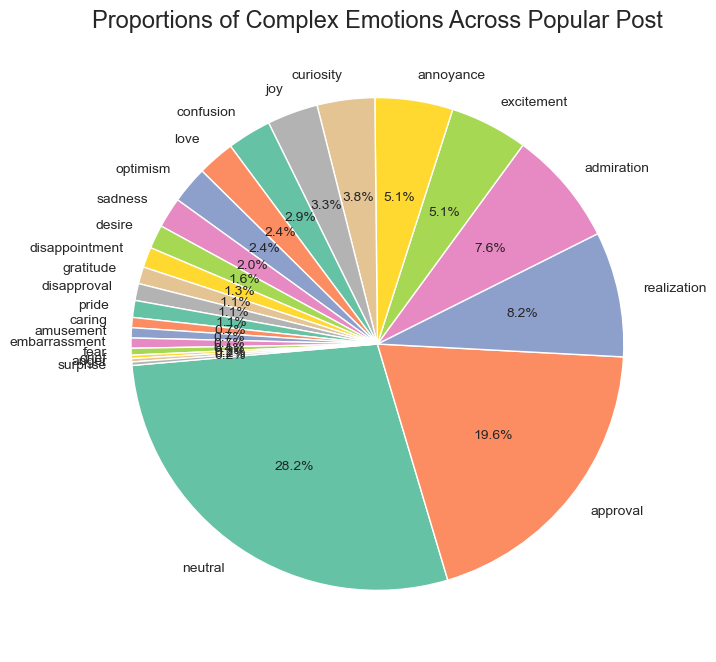

In [16]:
# Piechart
labels_post = proportion_total_emo_post_pd.index.get_level_values(0).astype(str)

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
colors = sns.color_palette("Set2", len(proportion_total_emo_post_pd))
plt.pie(proportion_total_emo_post_pd['proportion'],labels=labels_post, autopct='%1.1f%%', startangle=185,colors=colors)
plt.title('Proportions of Complex Emotions Across Popular Post',fontsize=17)
plt.show()

#### (2) Proportions of Complex Emotions Across Comments

In [23]:
total_emo_cm_lst = []

for list in df_cm['Top Three Emotions']:
    emotions_list = ast.literal_eval(list)
    for emo in emotions_list:
        total_emo_cm_lst.append(emo)

total_emo_cm = pd.DataFrame(total_emo_cm_lst)

In [25]:
proportion_total_emo_cm = total_emo_cm.value_counts(normalize=True)
proportion_total_emo_cm_pd = pd.DataFrame(proportion_total_emo_cm)
proportion_total_emo_cm_pd

proportion
0                         
neutral           0.253518
approval          0.171527
annoyance         0.077762
admiration        0.064397
realization       0.060728
disapproval       0.053620
confusion         0.044288
curiosity         0.042879
joy               0.028602
love              0.024483
amusement         0.021846
disappointment    0.019538
gratitude         0.018918
excitement        0.017873
anger             0.017861
optimism          0.016525
sadness           0.015638
caring            0.011118
desire            0.011008
surprise          0.008274
disgust           0.005370
remorse           0.004569
fear              0.003961
embarrassment     0.001482
nervousness       0.001434
pride             0.001300
relief            0.000984
grief             0.000498

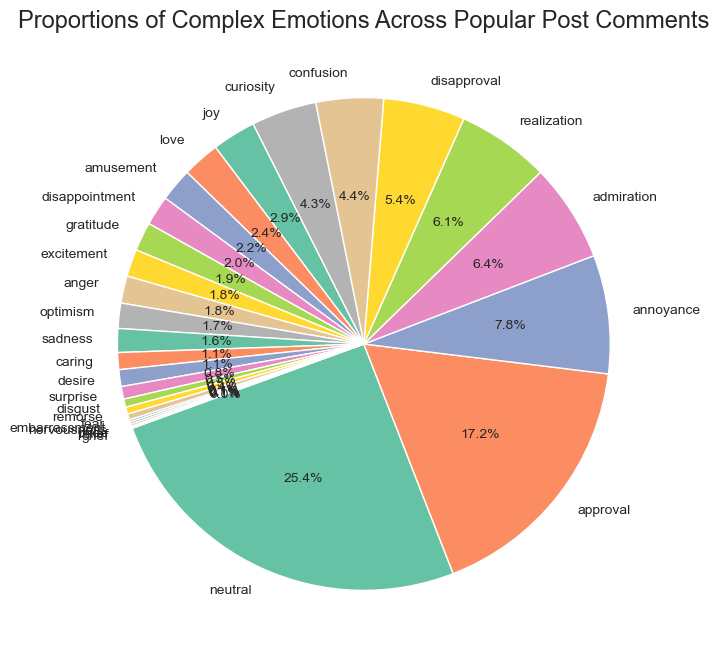

In [27]:
labels_cm = proportion_total_emo_cm_pd.index.get_level_values(0).astype(str)

sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
colors = sns.color_palette("Set2", len(proportion_total_emo_cm_pd))
plt.pie(proportion_total_emo_cm_pd['proportion'],labels=labels_cm, autopct='%1.1f%%', startangle=200,colors=colors)
plt.title('Proportions of Complex Emotions Across Popular Post Comments',fontsize=17)
plt.show()

### Save dfs with emotions classification to csv file

In [24]:
total_emo_post.to_csv('total_complex_emo_post.csv',index=False)
total_emo_cm.to_csv('total_complex_emo_cm.csv',index=False)

### Re-organize & Combine above datasets 

#### Combine post-related datasets

In [6]:
df = pd.read_csv('reddit_posts_complex_sentiments.csv')
df_score = pd.read_csv('reddit_posts_polarity_subjectivity.csv')

In [8]:
df_score['Top Emotion']= df['Top Emotion']
df_score['Top Three Emotions']= df['Top Three Emotions']

In [10]:
df_score.head(2)

Title     Author Subreddit  \
0  My parents chose to not attend their only daug...  isabeljdt      lgbt   
1  My Mum allowed me to put any flag on my wardro...   Chernyat      lgbt   

   Score        Content  Number of Comments  Upvote ratio Post id  \
0  95160  picture/video                1320          0.85  ewt93j   
1  54450  picture/video                1567          0.82  q97h86   

          Flair                                          Permalink  ... Month  \
0           NaN  /r/lgbt/comments/ewt93j/my_parents_chose_to_no...  ...     1   
1  Art/Creative  /r/lgbt/comments/q97h86/my_mum_allowed_me_to_p...  ...    10   

  Date  Hour                                      Title_Content  \
0   31    19  My parents chose to not attend their only daug...   
1   16     7  My Mum allowed me to put any flag on my wardro...   

   Polarity Score  Subjectivity Score Polarity Label  Subjectivity Label  \
0         -0.1875                0.65       Negative          Subjective   
1          0.0000                0.00        Neutral             Neutral   

   Top Emotion                          Top Three Emotions  
0      sadness  ['sadness', 'disappointment', 'annoyance']  
1      neutral      ['neutral', 'approval', 'realization']  

[2 rows x 23 columns]

In [12]:
df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   150 non-null    object 
 1   Author                  137 non-null    object 
 2   Subreddit               150 non-null    object 
 3   Score                   150 non-null    int64  
 4   Content                 150 non-null    object 
 5   Number of Comments      150 non-null    int64  
 6   Upvote ratio            150 non-null    float64
 7   Post id                 150 non-null    object 
 8   Flair                   83 non-null     object 
 9   Permalink               150 non-null    object 
 10  URL                     150 non-null    object 
 11  Creation Time Readable  150 non-null    object 
 12  Year                    150 non-null    int64  
 13  Month                   150 non-null    int64  
 14  Date                    150 non-null    in

#### Combine comment-related datasets

In [ ]:
df_cm = pd.read_csv('reddit_comments_complex_sentiments.csv')
df_cm_score = pd.read_csv('reddit_comments_polarity_subjectivity.csv')

In [16]:
df_cm_to_merge = df_cm[['Comment ID','Top Emotion','Top Three Emotions']]
df_cm_to_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27434 entries, 0 to 27433
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Comment ID          27434 non-null  object
 1   Top Emotion         27434 non-null  object
 2   Top Three Emotions  27434 non-null  object
dtypes: object(3)
memory usage: 643.1+ KB


In [18]:
merged_cm_df = pd.merge(df_cm_score, df_cm_to_merge, on='Comment ID', how='inner')
merged_cm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27434 entries, 0 to 27433
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Post ID             27434 non-null  object 
 1   Comment ID          27434 non-null  object 
 2   Comment Author      23617 non-null  object 
 3   Comment Content     27434 non-null  object 
 4   Comment Score       27434 non-null  int64  
 5   CM Time Readable    27434 non-null  object 
 6   CM Year             27434 non-null  int64  
 7   CM Month            27434 non-null  int64  
 8   CM Date             27434 non-null  int64  
 9   CM Hour             27434 non-null  int64  
 10  Polarity Score      27434 non-null  float64
 11  Subjectivity Score  27434 non-null  float64
 12  Polarity Label      27434 non-null  object 
 13  Subjectivity Label  27434 non-null  object 
 14  Top Emotion         27434 non-null  object 
 15  Top Three Emotions  27434 non-null  object 
dtypes: f

In [20]:
merged_cm_df.head(2)

Post ID Comment ID     Comment Author  \
0  ewt93j    fg4agrq  VampireStereotype   
1  ewt93j    fg4cg63            5557ttr   

                                     Comment Content  Comment Score  \
0  Well... A wedding is a celebration of love, so...           2482   
1  This picture looks like it’s straight out of a...           1083   

      CM Time Readable  CM Year  CM Month  CM Date  CM Hour  Polarity Score  \
0  2020-01-31 19:39:56     2020         1       31       19        0.409091   
1  2020-01-31 20:00:04     2020         1       31       20        0.125000   

   Subjectivity Score Polarity Label Subjectivity Label Top Emotion  \
0               0.600       Positive         Subjective  admiration   
1               0.575       Positive         Subjective      desire   

                       Top Three Emotions  
0           ['admiration', 'love', 'joy']  
1  ['desire', 'excitement', 'admiration']

#### Save combined datasets as csv. file

In [48]:
df_score.to_csv('reddit_posts_scores_emotions.csv',index=False)
merged_cm_df.to_csv('reddit_comments_scores_emotions.csv',index=False)

<h2 style="text-align:center; background-color:#fdfbd4; color:black; padding:5px;"><b>  Part V - Unsupervised Clustering Model - K-Means Model </b></h2><a id="part-v---unsupervised-clustering-model"></a>

## 1. Feature Engineering

In [3]:
df = pd.read_csv('reddit_posts_scores_emotions.csv')

#### Drop Unwanted Columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   150 non-null    object 
 1   Author                  137 non-null    object 
 2   Subreddit               150 non-null    object 
 3   Score                   150 non-null    int64  
 4   Content                 150 non-null    object 
 5   Number of Comments      150 non-null    int64  
 6   Upvote ratio            150 non-null    float64
 7   Post id                 150 non-null    object 
 8   Flair                   83 non-null     object 
 9   Permalink               150 non-null    object 
 10  URL                     150 non-null    object 
 11  Creation Time Readable  150 non-null    object 
 12  Year                    150 non-null    int64  
 13  Month                   150 non-null    int64  
 14  Date                    150 non-null    in

In [7]:
df['Author'].value_counts()

Author
drewiepoodle           4
kurocane               3
throwawayoftheday88    2
Trappist_1G            2
Homosexualmeme-        2
                      ..
sonicsilver427         1
LilLizardBoi           1
MattyHdot              1
TheTrekMachine         1
lenlennie              1
Name: count, Length: 125, dtype: int64

In [9]:
df = df.drop(['Title', 'Author','Content','Post id', 'Flair',
         'Permalink','URL', 'Creation Time Readable','Title_Content',
         'Polarity Label', 'Subjectivity Label', 'Top Emotion'],axis=1)

**Unwanted Columns** :

- This project is not intended to explore authors of the posts, 'Author' column will be droped.
- **'Title', 'Content' ,'Title_Content'** column contains str, its content sentiment has be interpreted and represented in other columns, so 'Content' column will be droped.
- **'Post id'** column is a unique identifier str of each post, it won't be useful for clustering, so this column will be droped.
- **'Flair'** column originally has 83 non-null values extracted from web scrapping process, it contains str values that is written by the author. It is like a tag which the author wants to creates. It is optional. Since, it has many null-values and it is hard to fill the null values, so this column might not be useful for clustering, so this column will be droped.
- **'Permalink', 'URL', 'Creation Time Readable'** columns will be droped due to irrelevant or redundant.
- **'Polarity Label' and 'Subjectivity Label'** will be droped, as they have the similar meannings to 'Subjectivity Score' and ' Polarity Score'.
- **'Top Emotion'** will be dropped too. We keep 'Top Three Emotions' column which we will perform one-hot encoding.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Subreddit           150 non-null    object 
 1   Score               150 non-null    int64  
 2   Number of Comments  150 non-null    int64  
 3   Upvote ratio        150 non-null    float64
 4   Year                150 non-null    int64  
 5   Month               150 non-null    int64  
 6   Date                150 non-null    int64  
 7   Hour                150 non-null    int64  
 8   Polarity Score      150 non-null    float64
 9   Subjectivity Score  150 non-null    float64
 10  Top Three Emotions  150 non-null    object 
dtypes: float64(3), int64(6), object(2)
memory usage: 13.0+ KB


#### Encode Top Three Emotion Column - Multi-Label-Binarizer

In [15]:
df['Top Three Emotions']

0      ['sadness', 'disappointment', 'annoyance']
1          ['neutral', 'approval', 'realization']
2              ['love', 'admiration', 'approval']
3          ['neutral', 'approval', 'realization']
4          ['neutral', 'approval', 'realization']
                          ...                    
145             ['joy', 'excitement', 'surprise']
146               ['neutral', 'fear', 'approval']
147                 ['caring', 'neutral', 'fear']
148              ['excitement', 'joy', 'neutral']
149              ['excitement', 'neutral', 'joy']
Name: Top Three Emotions, Length: 150, dtype: object

In [17]:
# df['Top Three Emotions'][0].dtype   #it shows it is a str object

In [19]:
import ast       # convert the str to actual list
df['Top Three Emotions'] = df['Top Three Emotions'].apply(ast.literal_eval)

In [21]:
# Encode 'Top Three Emotions' col with Multi-Label-Binarizer
from sklearn.preprocessing import MultiLabelBinarizer

emotions = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
            'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
            'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 
            'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 
            'remorse', 'sadness', 'surprise', 'neutral']

mlb = MultiLabelBinarizer(classes=emotions)

one_hot_encoded = mlb.fit_transform(df['Top Three Emotions'])

encoded_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

df_encoded = pd.concat([df, encoded_df], axis=1)

In [23]:
df_encoded = df_encoded.drop('Top Three Emotions',axis=1)

In [25]:
df_encoded.head()

Subreddit  Score  Number of Comments  Upvote ratio  Year  Month  Date  Hour  \
0      lgbt  95160                1320          0.85  2020      1    31    19   
1      lgbt  54450                1567          0.82  2021     10    16     7   
2      lgbt  42262                 483          0.91  2021      1    11    17   
3      lgbt  40268                 841          0.92  2020     11    12    15   
4      lgbt  40156                 733          0.71  2017      6     3    13   

   Polarity Score  Subjectivity Score  ...  love  nervousness  optimism  \
0       -0.187500            0.650000  ...     0            0         0   
1        0.000000            0.000000  ...     0            0         0   
2        0.500000            0.600000  ...     1            0         0   
3        0.178571            0.456349  ...     0            0         0   
4        0.500000            1.000000  ...     0            0         0   

   pride  realization  relief  remorse  sadness  surprise  neutral  
0      0            0       0        0        1         0        0  
1      0            1       0        0        0         0        1  
2      0            0       0        0        0         0        0  
3      0            1       0        0        0         0        1  
4      0            1       0        0        0         0        1  

[5 rows x 38 columns]

- Now, there are 27 new columns with each column representing a distinct emotion.
- Each post has three top emotions, meanning it has the value of '1' in three of these emotion columns.

In [28]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Subreddit           150 non-null    object 
 1   Score               150 non-null    int64  
 2   Number of Comments  150 non-null    int64  
 3   Upvote ratio        150 non-null    float64
 4   Year                150 non-null    int64  
 5   Month               150 non-null    int64  
 6   Date                150 non-null    int64  
 7   Hour                150 non-null    int64  
 8   Polarity Score      150 non-null    float64
 9   Subjectivity Score  150 non-null    float64
 10  admiration          150 non-null    int64  
 11  amusement           150 non-null    int64  
 12  anger               150 non-null    int64  
 13  annoyance           150 non-null    int64  
 14  approval            150 non-null    int64  
 15  caring              150 non-null    int64  
 16  confusio

- At first, I kept 'Subreddit' column to fit into the model, but then found it seems does not convey extra meanningful information. So, I decided to drop it.

In [31]:
df_encoded = df_encoded.drop('Subreddit',axis=1)

In [33]:
# Encode 'Subreddit' column with get_dummies function
# df_encoded = pd.get_dummies(df_encoded, columns=['Subreddit'], drop_first=True)

### Final Dataset used for Unsupervised Clustering

In [36]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 37 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Score               150 non-null    int64  
 1   Number of Comments  150 non-null    int64  
 2   Upvote ratio        150 non-null    float64
 3   Year                150 non-null    int64  
 4   Month               150 non-null    int64  
 5   Date                150 non-null    int64  
 6   Hour                150 non-null    int64  
 7   Polarity Score      150 non-null    float64
 8   Subjectivity Score  150 non-null    float64
 9   admiration          150 non-null    int64  
 10  amusement           150 non-null    int64  
 11  anger               150 non-null    int64  
 12  annoyance           150 non-null    int64  
 13  approval            150 non-null    int64  
 14  caring              150 non-null    int64  
 15  confusion           150 non-null    int64  
 16  curiosit

## 2. Unsupervised Clustering - K Means Model

### Data Scaling

In [40]:
X = df_encoded

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [44]:
scaled_X

array([[ 6.38573689,  2.75100304, -1.60686776, ...,  3.95811403,
        -0.08192319, -2.34983811],
       [ 3.35989995,  3.40628169, -2.09776423, ..., -0.25264558,
        -0.08192319,  0.42556123],
       [ 2.45400703,  0.53048388, -0.62507483, ..., -0.25264558,
        -0.08192319, -2.34983811],
       ...,
       [-0.66332599, -0.63946707,  0.3567181 , ..., -0.25264558,
        -0.08192319,  0.42556123],
       [-0.66481252, -0.69783197,  0.84761456, ..., -0.25264558,
        -0.08192319,  0.42556123],
       [-0.66525848, -0.67926132,  0.68398241, ..., -0.25264558,
        -0.08192319,  0.42556123]])

### Fit Model + Elbow Method for Finding Optimal K

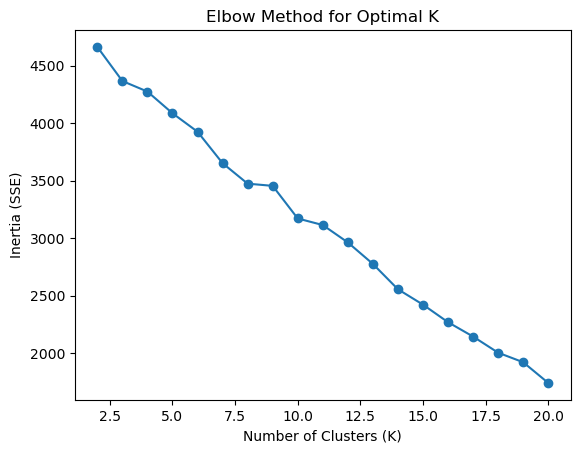

In [48]:
from sklearn.cluster import KMeans    # Create multiple models
sse = []                              # List to store the SSE (sum of squared errors (inertia))for each K

for k in range(2, 21):                # Testing K values from 2 to 20
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_X)
    sse.append(kmeans.inertia_)      # kmeans.inertia_ is the SSE(Sum of squared errors) /SSD (Sum of Squared Distances) for each K value

# Plot the elbow graph
plt.plot(range(2, 21), sse, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()


In [49]:
sse

[4661.759304993268,
 4365.177478227675,
 4273.414920128307,
 4084.8981568377476,
 3924.3040472301786,
 3650.6907522740644,
 3472.7682720866574,
 3453.5375238994293,
 3169.887596109359,
 3112.830568673312,
 2961.6541836047227,
 2774.8610347878866,
 2554.3061534572003,
 2420.633481064978,
 2267.889063848716,
 2142.9875131590247,
 2002.754212595311,
 1919.7856696236408,
 1739.8749989203172]

Text(0, 0.5, 'Sum of Squared Error (SSE)')

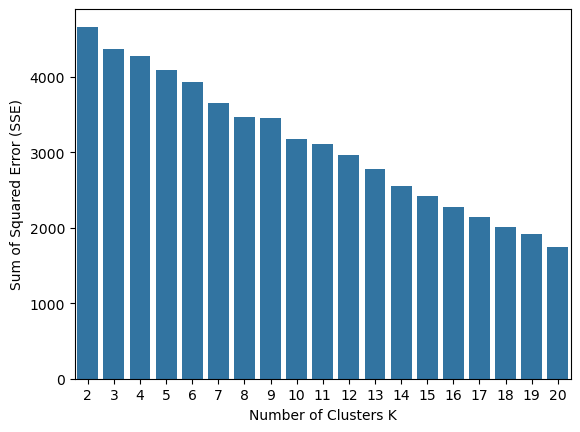

In [52]:
sns.barplot(x=range(2, 21), y=sse)
plt.xlabel('Number of Clusters K')
plt.ylabel('Sum of Squared Error (SSE)')

In [54]:
sse_diff = np.diff(sse, prepend=sse[0])    #calculates the difference between consecutive elements(sse) in the array.

In [56]:
sse_diff

array([   0.        , -296.58182677,  -91.7625581 , -188.51676329,
       -160.59410961, -273.61329496, -177.92248019,  -19.23074819,
       -283.64992779,  -57.05702744, -151.17638507, -186.79314882,
       -220.55488133, -133.67267239, -152.74441722, -124.90155069,
       -140.23330056,  -82.96854297, -179.9106707 ])

Text(0, 0.5, 'The SSE Difference from the previous cluster')

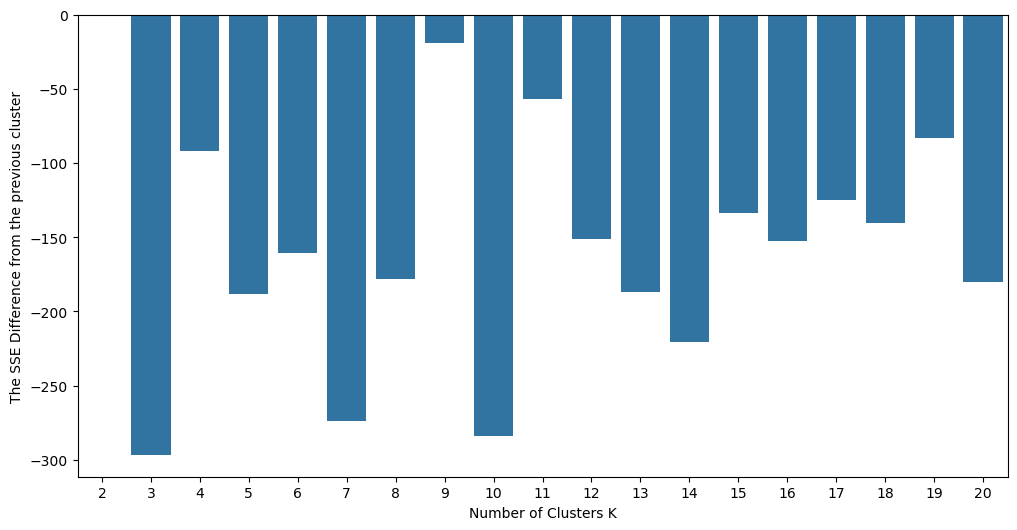

In [58]:
# SSD Barplot
# Plot the SSD differences

plt.figure(figsize=(12, 6))
sns.barplot(x=range(2, 21),y=sse_diff)
plt.xlabel('Number of Clusters K')
plt.ylabel('The SSE Difference from the previous cluster')

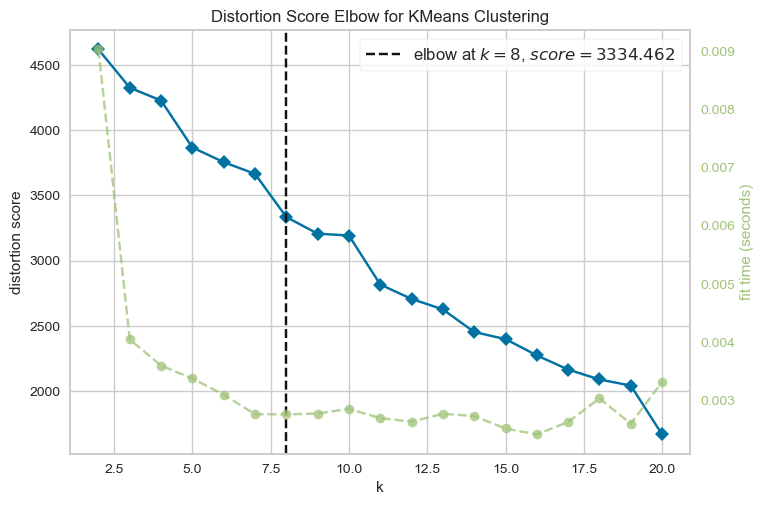

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
from yellowbrick.cluster import KElbowVisualizer

# Create the Elbow Visualizer for max number of 10 clusters
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(scaled_X)
Elbow_M.show()

Insight:
- Based on the result of Elbow method, optimal K can be 8.

### Visualize Clusters 

### Method 1 - Reduce all featueres into 2 dimensions for visualization

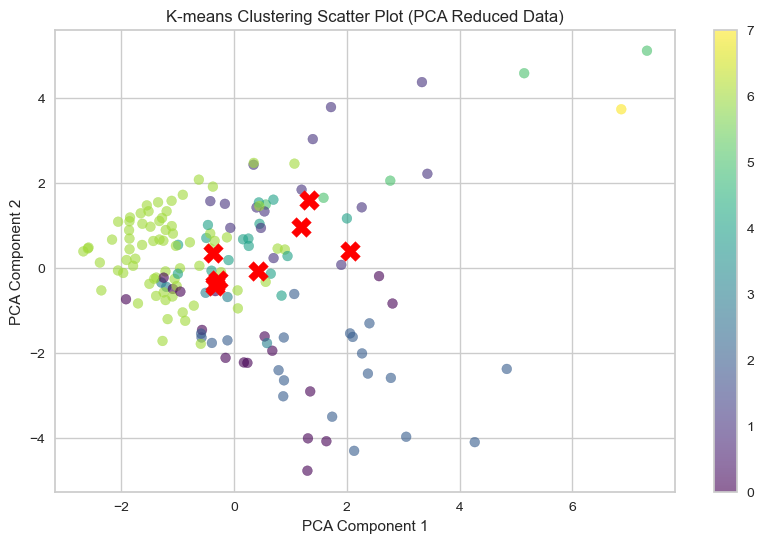

In [88]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

k = 8  # chosen k from the Elbow Method
kmeans = KMeans(n_clusters=k)
kmeans.fit(scaled_X)
labels = kmeans.labels_

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
reduced_X = pca.fit_transform(scaled_X)

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # cluster centers
plt.title('K-means Clustering Scatter Plot (PCA Reduced Data)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter)
plt.show()

### Method 2 - Explore Important Features for Visualization

#### Create a new column for newly created cluster labels

In [48]:
from sklearn.cluster import KMeans
k = 8  # chosen k from the Elbow Method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_X)
labels = kmeans.labels_


In [50]:
labels

array([5, 2, 0, 2, 2, 0, 6, 3, 5, 5, 5, 4, 4, 2, 4, 3, 4, 4, 4, 4, 5, 4,
       2, 0, 5, 5, 3, 2, 5, 5, 3, 0, 7, 3, 3, 3, 7, 1, 5, 3, 6, 4, 6, 1,
       6, 3, 5, 2, 2, 5, 2, 6, 0, 1, 3, 7, 0, 2, 2, 0, 3, 2, 2, 6, 3, 2,
       3, 2, 3, 2, 4, 2, 1, 5, 5, 2, 6, 1, 6, 2, 0, 2, 1, 2, 3, 0, 2, 2,
       2, 5, 5, 0, 3, 5, 1, 2, 4, 2, 7, 5, 4, 5, 2, 1, 5, 5, 5, 2, 6, 2,
       3, 2, 6, 3, 1, 3, 5, 6, 5, 5, 3, 7, 6, 3, 2, 2, 5, 2, 3, 3, 3, 3,
       2, 2, 2, 5, 2, 5, 2, 5, 2, 1, 5, 2, 2, 6, 5, 5, 6, 6], dtype=int32)

In [69]:
df_encoded['cluster label']=labels

In [81]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Score               150 non-null    int64  
 1   Number of Comments  150 non-null    int64  
 2   Upvote ratio        150 non-null    float64
 3   Year                150 non-null    int64  
 4   Month               150 non-null    int64  
 5   Date                150 non-null    int64  
 6   Hour                150 non-null    int64  
 7   Polarity Score      150 non-null    float64
 8   Subjectivity Score  150 non-null    float64
 9   admiration          150 non-null    int64  
 10  amusement           150 non-null    int64  
 11  anger               150 non-null    int64  
 12  annoyance           150 non-null    int64  
 13  approval            150 non-null    int64  
 14  caring              150 non-null    int64  
 15  confusion           150 non-null    int64  
 16  curiosit

### Use newly created label to discover insights and patterns

In [87]:
# Compare means
cluster_mean = df_encoded.groupby('cluster label')[['Score', 'Number of Comments', 'Upvote ratio', 'Year','Month', 'Date' , 'Hour','Polarity Score','Subjectivity Score']].mean()
cluster_mean

Score  Number of Comments  Upvote ratio         Year  \
cluster label                                                                
0              11638.000000          171.200000      0.963000  2021.900000   
1               8408.100000          291.100000      0.952000  2020.100000   
2               8196.560976          252.487805      0.946585  2021.073171   
3               8740.280000          303.840000      0.958400  2020.080000   
4               5189.666667          526.166667      0.926667  2022.416667   
5              12327.625000          258.531250      0.943125  2021.093750   
6               9710.466667          270.266667      0.944667  2019.733333   
7               5875.400000          248.800000      0.968000  2020.400000   

                  Month       Date       Hour  Polarity Score  \
cluster label                                                   
0              5.900000  17.700000  14.300000        0.557917   
1              5.200000   8.600000  15.500000        0.252457   
2              7.463415  14.512195  13.707317        0.112748   
3              3.240000  20.720000  11.600000        0.080397   
4              7.583333  17.666667  11.166667        0.136724   
5              6.843750  16.000000  10.781250        0.246128   
6              6.933333  13.333333  13.333333        0.482222   
7              4.200000  18.000000  15.800000       -0.061667   

               Subjectivity Score  
cluster label                      
0                        0.501667  
1                        0.554478  
2                        0.329249  
3                        0.341158  
4                        0.432322  
5                        0.510214  
6                        0.529722  
7                        0.238333

In [101]:
# Compare means
cluster_emotion_mean = df_encoded.groupby('cluster label')[['admiration','amusement', 'anger','annoyance','approval', 'caring' ,'confusion','curiosity','desire',
                                                   'disappointment','disapproval','disgust','embarrassment','excitement','fear','gratitude','grief',
                                                   'joy','love','nervousness','optimism','pride','realization','relief','remorse','sadness',
                                                   'surprise','neutral']].mean()
cluster_emotion_mean

admiration  amusement  anger  annoyance  approval   caring  \
cluster label                                                               
0                0.600000   0.000000   0.00   0.000000  0.500000  0.00000   
1                0.100000   0.000000   0.00   0.000000  0.700000  0.00000   
2                0.000000   0.000000   0.00   0.000000  0.926829  0.02439   
3                0.040000   0.040000   0.04   0.680000  0.720000  0.04000   
4                0.000000   0.083333   0.00   0.083333  0.000000  0.00000   
5                0.593750   0.031250   0.00   0.062500  0.593750  0.03125   
6                0.466667   0.000000   0.00   0.000000  0.000000  0.00000   
7                0.000000   0.000000   0.00   0.600000  0.200000  0.00000   

               confusion  curiosity   desire  disappointment  ...     love  \
cluster label                                                 ...            
0                0.00000   0.000000  0.20000         0.00000  ...  1.00000   
1                0.00000   0.000000  0.20000         0.00000  ...  0.00000   
2                0.02439   0.000000  0.00000         0.00000  ...  0.00000   
3                0.00000   0.160000  0.08000         0.00000  ...  0.00000   
4                1.00000   1.000000  0.00000         0.00000  ...  0.00000   
5                0.00000   0.000000  0.03125         0.15625  ...  0.03125   
6                0.00000   0.066667  0.00000         0.00000  ...  0.00000   
7                0.00000   0.000000  0.00000         0.20000  ...  0.00000   

               nervousness  optimism     pride  realization  relief  remorse  \
cluster label                                                                  
0                      0.0       0.1  0.000000     0.100000     0.0      0.0   
1                      0.0       1.0  0.000000     0.000000     0.0      0.0   
2                      0.0       0.0  0.024390     0.878049     0.0      0.0   
3                      0.0       0.0  0.000000     0.000000     0.0      0.0   
4                      0.0       0.0  0.000000     0.000000     0.0      0.0   
5                      0.0       0.0  0.062500     0.000000     0.0      0.0   
6                      0.0       0.0  0.133333     0.000000     0.0      0.0   
7                      0.0       0.0  0.000000     0.000000     0.0      0.0   

               sadness  surprise   neutral  
cluster label                               
0              0.10000  0.000000  0.300000  
1              0.00000  0.000000  0.900000  
2              0.02439  0.000000  0.951220  
3              0.00000  0.000000  0.960000  
4              0.00000  0.000000  0.833333  
5              0.21875  0.000000  0.937500  
6              0.00000  0.066667  0.466667  
7              0.00000  0.000000  1.000000  

[8 rows x 28 columns]

### Discover more on complex emotions among each cluster

In [143]:
non_zero_values = cluster_emotion_mean[cluster_emotion_mean != 0]

In [145]:
non_zero_positions = non_zero_values.stack().reset_index()
non_zero_positions.columns = ['Cluster Label', 'Emotion', 'Value']

In [165]:
non_zero_positions

Cluster Label         Emotion  Value
0               0      admiration    0.6
1               0        approval    0.5
2               0          desire    0.2
3               0             joy    0.1
4               0            love    1.0
..            ...             ...    ...
63              7       annoyance    0.6
64              7        approval    0.2
65              7  disappointment    0.2
66              7     disapproval    1.0
67              7         neutral    1.0

[68 rows x 3 columns]

Explore each cluster's emotion combinations to see if there are distinctive differences among these clusters.

In [113]:
non_zero_positions = non_zero_positions[non_zero_positions['Value'] != 0]
print(non_zero_positions)

    Cluster Label         Emotion  Value
0               0      admiration    0.6
1               0        approval    0.5
2               0          desire    0.2
3               0             joy    0.1
4               0            love    1.0
..            ...             ...    ...
63              7       annoyance    0.6
64              7        approval    0.2
65              7  disappointment    0.2
66              7     disapproval    1.0
67              7         neutral    1.0

[68 rows x 3 columns]


In [115]:
non_zero_positions[non_zero_positions['Cluster Label']==0]

Cluster Label      Emotion  Value
0              0   admiration    0.6
1              0     approval    0.5
2              0       desire    0.2
3              0          joy    0.1
4              0         love    1.0
5              0     optimism    0.1
6              0  realization    0.1
7              0      sadness    0.1
8              0      neutral    0.3

Cluster 0 : featured at love, admiration, approval.

In [117]:
non_zero_positions[non_zero_positions['Cluster Label']==1]

Cluster Label     Emotion  Value
9               1  admiration    0.1
10              1    approval    0.7
11              1      desire    0.2
12              1  excitement    0.1
13              1    optimism    1.0
14              1     neutral    0.9

Cluster 1: feature at optimism, neutral, approval

In [119]:
non_zero_positions[non_zero_positions['Cluster Label']==2]

Cluster Label      Emotion     Value
15              2     approval  0.926829
16              2       caring  0.024390
17              2    confusion  0.024390
18              2   excitement  0.146341
19              2        pride  0.024390
20              2  realization  0.878049
21              2      sadness  0.024390
22              2      neutral  0.951220

Cluster 2: feature at neutral, approval, realization

In [121]:
non_zero_positions[non_zero_positions['Cluster Label']==3]

Cluster Label        Emotion  Value
23              3     admiration   0.04
24              3      amusement   0.04
25              3          anger   0.04
26              3      annoyance   0.68
27              3       approval   0.72
28              3         caring   0.04
29              3      curiosity   0.16
30              3         desire   0.08
31              3  embarrassment   0.12
32              3     excitement   0.08
33              3            joy   0.04
34              3        neutral   0.96

Cluster 3: feature at neutral, approval and annoyance.

In [123]:
non_zero_positions[non_zero_positions['Cluster Label']==4]

Cluster Label    Emotion     Value
35              4  amusement  0.083333
36              4  annoyance  0.083333
37              4  confusion  1.000000
38              4  curiosity  1.000000
39              4    neutral  0.833333

Cluster 4: feature at confusion and curiosity.

In [125]:
non_zero_positions[non_zero_positions['Cluster Label']==5]

Cluster Label         Emotion    Value
40              5      admiration  0.59375
41              5       amusement  0.03125
42              5       annoyance  0.06250
43              5        approval  0.59375
44              5          caring  0.03125
45              5          desire  0.03125
46              5  disappointment  0.15625
47              5      excitement  0.03125
48              5            fear  0.06250
49              5       gratitude  0.12500
50              5           grief  0.03125
51              5            love  0.03125
52              5           pride  0.06250
53              5         sadness  0.21875
54              5         neutral  0.93750

Cluster 5: feature at neutral, and admiration.

In [127]:
non_zero_positions[non_zero_positions['Cluster Label']==6]

Cluster Label     Emotion     Value
55              6  admiration  0.466667
56              6   curiosity  0.066667
57              6  excitement  0.866667
58              6   gratitude  0.066667
59              6         joy  0.866667
60              6       pride  0.133333
61              6    surprise  0.066667
62              6     neutral  0.466667

Cluster 6: feature at exactement and joy.

In [129]:
non_zero_positions[non_zero_positions['Cluster Label']==7]

Cluster Label         Emotion  Value
63              7       annoyance    0.6
64              7        approval    0.2
65              7  disappointment    0.2
66              7     disapproval    1.0
67              7         neutral    1.0

Cluster 7: feature at disapproval and neutral.

Insights:

- We can see there are differences in the combination of emotions among these clusters.
- So, we focus on visualizing the clusters based on combination of emotions.

### Visualization of Clusters - Based on Complex Emotional Features

#### Re-organise datasets

In [257]:
non_zero_positions

Cluster Label         Emotion  Value
0               0      admiration    0.6
1               0        approval    0.5
2               0          desire    0.2
3               0             joy    0.1
4               0            love    1.0
..            ...             ...    ...
63              7       annoyance    0.6
64              7        approval    0.2
65              7  disappointment    0.2
66              7     disapproval    1.0
67              7         neutral    1.0

[68 rows x 3 columns]

In [259]:
non_zero_positions.to_csv('New Clusters with Complex Emotion Proportion.csv',index=False)

In [263]:
df_encoded.to_csv('df_encoded_emtion_cluster.csv', index=False)

In [265]:
df_encoded = pd.read_csv('df_encoded_emtion_cluster.csv')

In [269]:
df_encoded_emotion_cluster = df_encoded[['admiration','amusement', 'anger','annoyance','approval', 'caring' ,'confusion','curiosity','desire',
                                                   'disappointment','disapproval','disgust','embarrassment','excitement','fear','gratitude','grief',
                                                   'joy','love','nervousness','optimism','pride','realization','relief','remorse','sadness',
                                                   'surprise','neutral','cluster label']]
df_encoded_emotion_cluster

admiration  amusement  anger  annoyance  approval  caring  confusion  \
0             0          0      0          1         0       0          0   
1             0          0      0          0         1       0          0   
2             1          0      0          0         1       0          0   
3             0          0      0          0         1       0          0   
4             0          0      0          0         1       0          0   
..          ...        ...    ...        ...       ...     ...        ...   
145           0          0      0          0         0       0          0   
146           0          0      0          0         1       0          0   
147           0          0      0          0         0       1          0   
148           0          0      0          0         0       0          0   
149           0          0      0          0         0       0          0   

     curiosity  desire  disappointment  ...  nervousness  optimism  pride  \
0            0       0               1  ...            0         0      0   
1            0       0               0  ...            0         0      0   
2            0       0               0  ...            0         0      0   
3            0       0               0  ...            0         0      0   
4            0       0               0  ...            0         0      0   
..         ...     ...             ...  ...          ...       ...    ...   
145          0       0               0  ...            0         0      0   
146          0       0               0  ...            0         0      0   
147          0       0               0  ...            0         0      0   
148          0       0               0  ...            0         0      0   
149          0       0               0  ...            0         0      0   

     realization  relief  remorse  sadness  surprise  neutral  cluster label  
0              0       0        0        1         0        0              5  
1              1       0        0        0         0        1              2  
2              0       0        0        0         0        0              0  
3              1       0        0        0         0        1              2  
4              1       0        0        0         0        1              2  
..           ...     ...      ...      ...       ...      ...            ...  
145            0       0        0        0         1        0              6  
146            0       0        0        0         0        1              5  
147            0       0        0        0         0        1              5  
148            0       0        0        0         0        1              6  
149            0       0        0        0         0        1              6  

[150 rows x 29 columns]

### 2D Visualization of Clusters Based on Complex Emotional Proportions

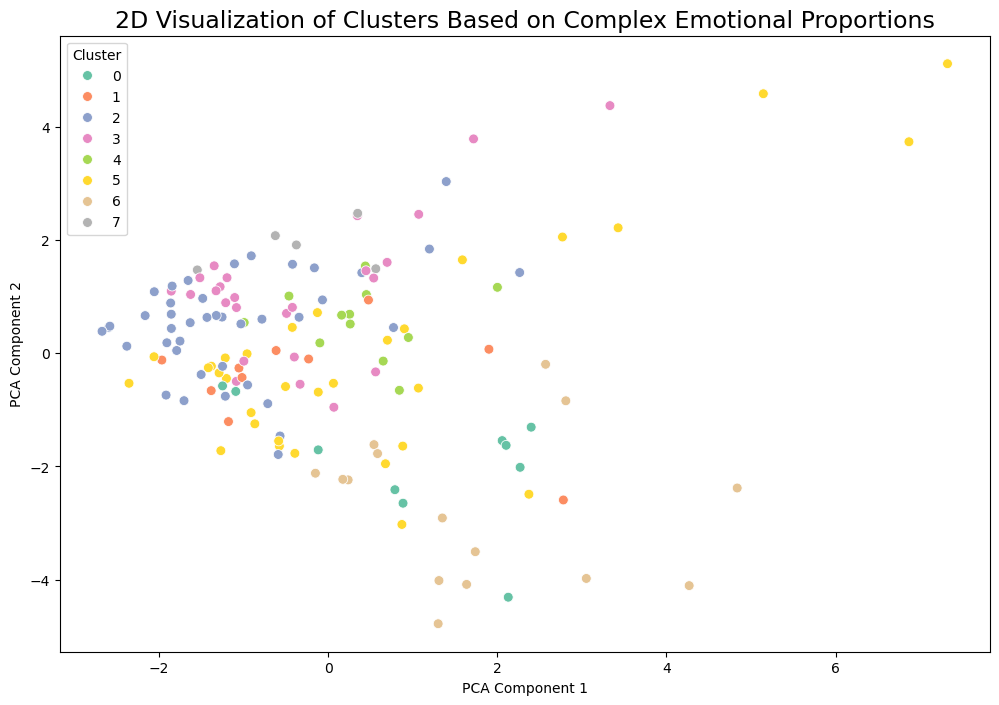

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_X)

# Create a DataFrame for plotting
reduced_df_1 = pd.DataFrame(reduced_data, columns=['Component 1', 'Component 2'])
reduced_df_1['Cluster Label'] = labels

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=reduced_df_1, x='Component 1', y='Component 2', hue='Cluster Label', palette="Set2", s=50)
plt.title("2D Visualization of Clusters Based on Complex Emotional Proportions", fontsize=17)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster', loc='best')
plt.show()

### More Trials with Different Number of Clusters / Parameters

### Other Trial - 1 : 2D Visualization of 5 Clusters Based on Complex Emotional Propotions

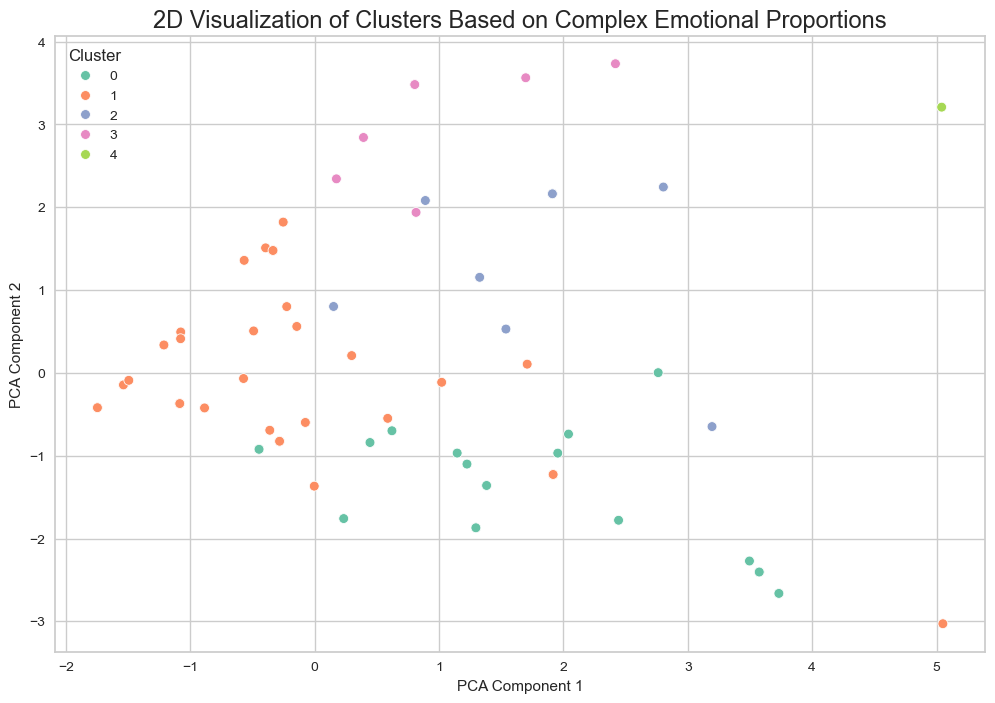

In [230]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded_emotion_cluster.drop('cluster label',axis=1))

# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5)  
cluster_labels = kmeans.fit_predict(scaled_data)

# Create a DataFrame for plotting
reduced_df = pd.DataFrame(reduced_data, columns=['Component 1', 'Component 2'])
reduced_df['Cluster Label'] = cluster_labels

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=reduced_df, x='Component 1', y='Component 2', hue='Cluster Label', palette="Set2", s=50)
plt.title("2D Visualization of Clusters Based on Complex Emotional Proportions", fontsize=17)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster', loc='best')
plt.show()

### Other Trial -2 : 2D Visualization of 8 Clusters Based on Complex Emotional Propotions

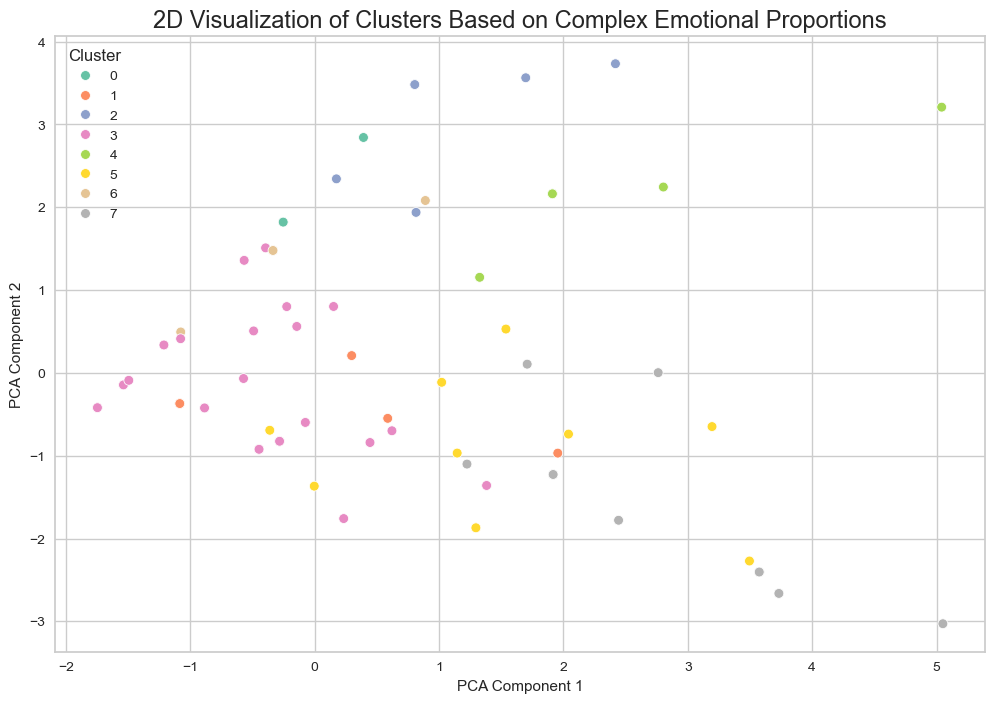

In [203]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded_emotion_cluster.drop('cluster label',axis=1))

# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Apply K-means clustering
kmeans = KMeans(n_clusters=8)  
cluster_labels = kmeans.fit_predict(scaled_data)

# Create a DataFrame for plotting
reduced_df = pd.DataFrame(reduced_data, columns=['Component 1', 'Component 2'])
reduced_df['Cluster Label'] = labels

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=reduced_df, x='Component 1', y='Component 2', hue='Cluster Label', palette="Set2", s=50)
plt.title("2D Visualization of Clusters Based on Complex Emotional Proportions", fontsize=17)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster', loc='best')
plt.show()

## 3. Unsupervised Clustering - Sentence Transformer + PCA + K-Means Clustering

In [76]:
df = pd.read_csv('reddit_posts_sentiments.csv')

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   150 non-null    object 
 1   Author                  137 non-null    object 
 2   Subreddit               150 non-null    object 
 3   Score                   150 non-null    int64  
 4   Content                 25 non-null     object 
 5   Number of Comments      150 non-null    int64  
 6   Upvote ratio            150 non-null    float64
 7   Post id                 150 non-null    object 
 8   Flair                   83 non-null     object 
 9   Permalink               150 non-null    object 
 10  URL                     150 non-null    object 
 11  Creation Time Readable  150 non-null    object 
 12  Year                    150 non-null    int64  
 13  Month                   150 non-null    int64  
 14  Date                    150 non-null    in

In [82]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

In [84]:
pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 4.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.3.0
    Uninstalling sentence-transformers-3.3.0:
      Successfully uninstalled sentence-transformers-3.3.0
Note: you may need to restart the kernel to use updated packages.


In [86]:
df['Title'][0]

'My parents chose to not attend their only daughter’s wedding and I couldn’t be happier. Sucks to be them!'

In [88]:
from sentence_transformers import SentenceTransformer

model_sf = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings_1 = model_sf.encode(df['Title'][0])          # encode first title into a 384 dimensional array 
embeddings_1

array([ 5.74536324e-02,  5.46553396e-02,  5.05483299e-02,  1.88208967e-02,
        5.76336272e-02, -6.99307472e-02, -2.58729570e-02, -6.22175224e-02,
        1.10852435e-01,  2.94015892e-02,  5.83012030e-02,  3.34676839e-02,
        6.74360171e-02, -6.40420839e-02, -5.65947555e-02, -4.38303426e-02,
        4.70642336e-02, -5.37084304e-02, -3.80421355e-02, -1.71332881e-02,
       -8.56201798e-02, -2.34011915e-02, -2.39586979e-02,  7.95032531e-02,
        4.84659523e-02,  3.27620171e-02, -6.25082701e-02,  1.89335141e-02,
       -3.77086848e-02, -7.06568407e-03, -1.36155076e-02,  5.46290316e-02,
        3.83766065e-03,  7.47373998e-02,  6.15531951e-03, -8.15455616e-02,
        1.23092707e-03, -6.46906346e-02,  1.90130863e-02,  7.35227158e-03,
        3.54993418e-02,  1.12206146e-01,  6.44527897e-02, -5.28117791e-02,
        4.27588299e-02, -5.58761470e-02,  6.95245415e-02, -7.60319978e-02,
        9.53253824e-03,  5.57203330e-02,  3.01258750e-02,  4.42402810e-02,
       -1.71163660e-02, -

In [90]:
embeddings_all_titles = model_sf.encode(df['Title'])          # convert each title into a 384 dimensional dense vector space 
embeddings_all_titles

array([[ 0.05745367,  0.05465535,  0.05054833, ...,  0.02789024,
        -0.02384001,  0.02457229],
       [ 0.11078295,  0.1221198 , -0.06980099, ..., -0.03224246,
        -0.09308441, -0.06124543],
       [-0.01789533,  0.13383058,  0.09299217, ..., -0.00070718,
         0.06547215, -0.00606685],
       ...,
       [-0.01948634,  0.01697699,  0.04573547, ..., -0.04423584,
         0.00787683, -0.08713162],
       [-0.03548731,  0.01426723,  0.06766249, ...,  0.03241866,
        -0.09075183, -0.06313173],
       [ 0.00489804, -0.10084134,  0.0449682 , ..., -0.03976829,
         0.02117987, -0.08068822]], dtype=float32)

Remarks:

- According to official documentation, it maps sentences/paragraphs to a 384 dimensional dense vector space.
- Each value in the vector corresponds to a dimension in this space.
- Each dimension represents different aspects of the meaning of the sentence or phrase.
- The dimensions are learned representations of different semantic features.
- Since this model is an unsupervised learning model, so it does not have specific pre-defined labels.
- But the embedded outputs (each text returns a 384 dimensional array of values) can be used for tasks like clustering or semantic search.

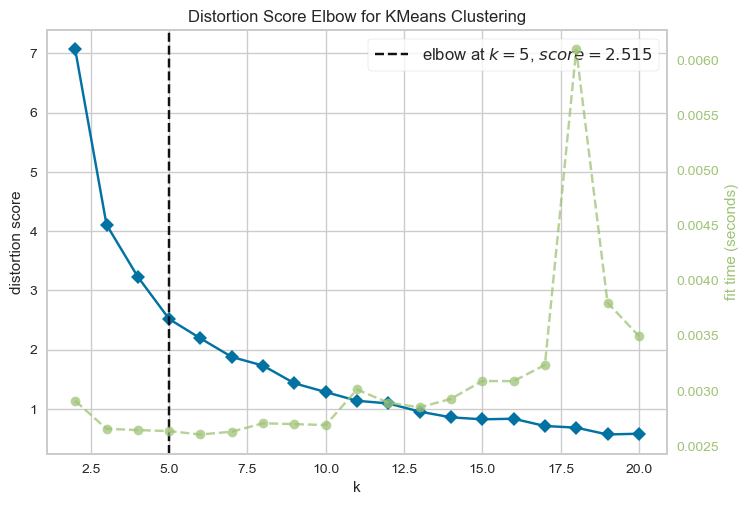

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [107]:
from yellowbrick.cluster import KElbowVisualizer

# Create the Elbow Visualizer for max number of 10 clusters
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(reduced_data)
Elbow_M.show()

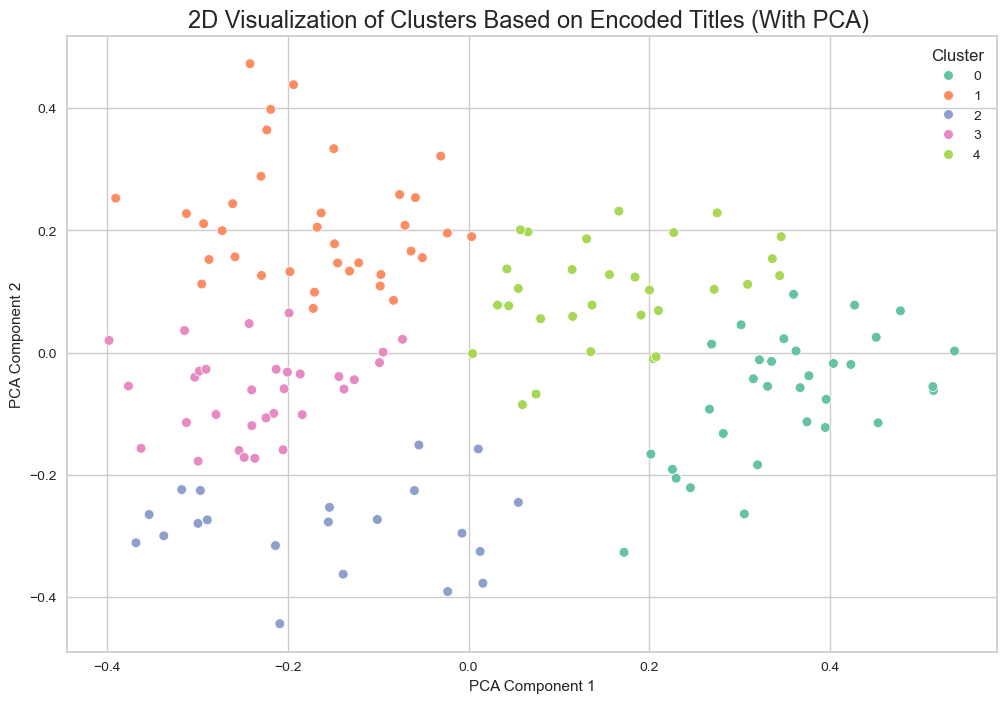

In [261]:
# Perform PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(embeddings_all_titles)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  
cluster_labels = kmeans.fit_predict(reduced_data)

# Create a DataFrame for plotting
reduced_df = pd.DataFrame(reduced_data, columns=['Component 1', 'Component 2'])
reduced_df['Cluster Label'] = cluster_labels

# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=reduced_df, x='Component 1', y='Component 2', hue='Cluster Label', palette="Set2", s=50)
plt.title("2D Visualization of Clusters Based on Encoded Titles (With PCA) ", fontsize=17)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title='Cluster', loc='best')
plt.show()

In [125]:
cluster_labels

array([3, 2, 3, 0, 1, 1, 2, 0, 1, 1, 1, 0, 0, 4, 4, 1, 4, 0, 0, 0, 1, 1,
       3, 3, 3, 1, 1, 1, 4, 4, 0, 3, 1, 3, 3, 0, 0, 4, 0, 4, 4, 1, 2, 3,
       2, 0, 2, 0, 4, 1, 0, 2, 2, 2, 0, 3, 0, 0, 3, 0, 4, 0, 4, 1, 2, 0,
       4, 0, 2, 0, 3, 1, 0, 3, 1, 1, 3, 3, 3, 4, 0, 1, 2, 3, 3, 3, 2, 4,
       1, 4, 2, 3, 3, 1, 2, 0, 4, 3, 1, 1, 1, 4, 4, 2, 1, 3, 1, 1, 3, 0,
       2, 4, 3, 4, 3, 1, 4, 4, 3, 2, 4, 0, 1, 4, 4, 4, 4, 0, 1, 0, 1, 3,
       1, 4, 4, 3, 1, 3, 0, 3, 1, 0, 1, 2, 2, 2, 0, 4, 2, 0], dtype=int32)

In [115]:
df['cluster_labels'] = cluster_labels

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   150 non-null    object 
 1   Author                  137 non-null    object 
 2   Subreddit               150 non-null    object 
 3   Score                   150 non-null    int64  
 4   Content                 25 non-null     object 
 5   Number of Comments      150 non-null    int64  
 6   Upvote ratio            150 non-null    float64
 7   Post id                 150 non-null    object 
 8   Flair                   83 non-null     object 
 9   Permalink               150 non-null    object 
 10  URL                     150 non-null    object 
 11  Creation Time Readable  150 non-null    object 
 12  Year                    150 non-null    int64  
 13  Month                   150 non-null    int64  
 14  Date                    150 non-null    in

In [177]:
# Save df as csv file
df.to_csv('sentence_transfer_titles_pca_cluster.csv',index = False)

### Titles From Each Clusters

In [127]:
for cluster_num in range(5):
    print(f"Cluster {cluster_num}:")
    cluster_sentences = [df['Title'][i] for i in range(len(cluster_labels)) if cluster_labels[i] == cluster_num]
    print(cluster_sentences)
    print()

Cluster 0:
["North Dakota's first openly lesbian official defends her right to have the Pride flag flown in the city", '"The lack of Boomer LGBTQ+ People"', 'Am I transphobic?', 'What\'s the funniest anti-LGBT "argument" you\'ve heard?', 'Hatred against transsexuals has increased, why?', 'Is there a reason that there is such a strong presence of Transphobia on this sub in particular?', "What's with online LGBT+ people spreading homophobia/transphobia", '[Non-LGBT] Petition to make this the upvote button for this sub', '[Non-LGBT] I’d like to lodge a formal complaint about this defective post', 'My friends and I going against our homophobic school staff! [picture]', "[Non-LGBT] UPDATE: my therapist has talked my parents out of sending me to conversion therapy, and I couldn't be more grateful", 'My fellow American LGBTQ+ community, we must support #BlackLivesMatter. The entire movement that lead to us earning the rights we have was born from a riot - one that was incited by POC who would

In [137]:
cluster_title = df.groupby('cluster_labels')['Title'].sum()
cluster_title 

cluster_labels
0    North Dakota's first openly lesbian official d...
1    Magic Johnson's son"best friend"It’s sad, but ...
2    My Mum allowed me to put any flag on my wardro...
3    My parents chose to not attend their only daug...
4    The word “Biological”[Meta] Could we Create a ...
Name: Title, dtype: object

### KeyWords From Each Cluster 

In [143]:
from wordcloud import WordCloud

### Keywords - Cluster 0

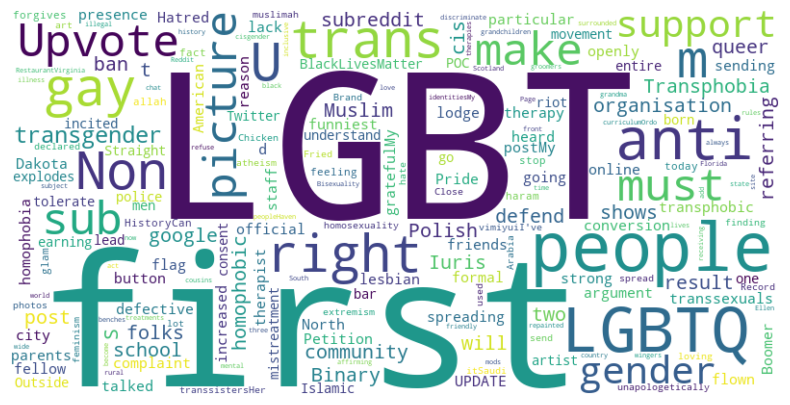

In [212]:
# Create the word cloud - Cluster 0
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_title[0])
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Cluster 0 - posts include:
- Rights of LGBTQs and societal aspects. Keywords (e.g. right, movement, pertition, support, anti, ilegal, organisation etc)

### Keywords - Cluster 1

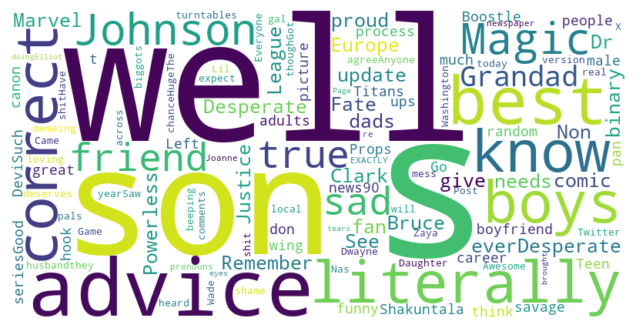

In [163]:
# Create the word cloud - Cluster 1
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_title[1])
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Cluster 1 - posts include :
- Entertainment and cultural content. Keywords (e.g. Marvel, Magic, comic  etc)
- Family, friends and social life. Keywords (e.g. son, dads, friend, boys, advice, Twitter, etc)

### Keywords - Cluster 2

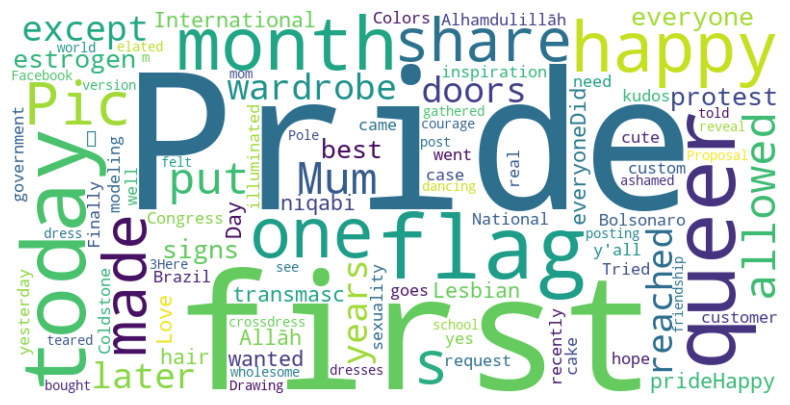

In [155]:
# Create the word cloud - Cluster 2
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_title[2])
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Cluster 2 - posts include :
- Pride and Positive Emotions. Keywords (e.g. Pride, PrideHappy, happy etc)

### Keywords - Cluster 3

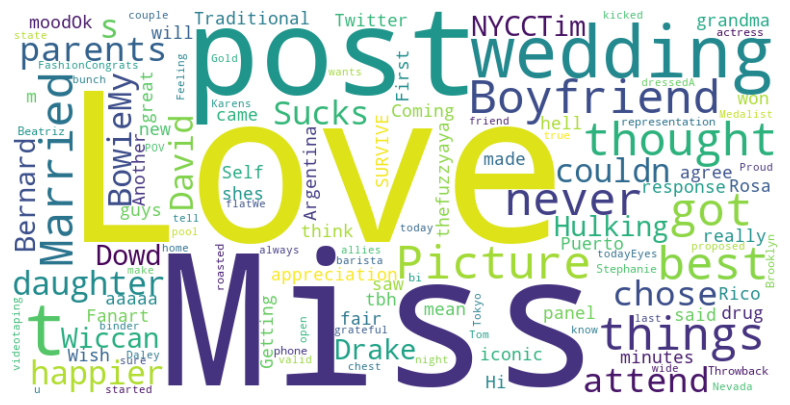

In [157]:
# Create the word cloud - Cluster 3
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_title[3])
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Cluster 3 - posts include :
- Initmate relationships, mariage, family and personal stories.
- Keywords (e.g. Love, miss, wedding, boyfriend, married , parents, daughter, etc)

### Keywords - Cluster 4

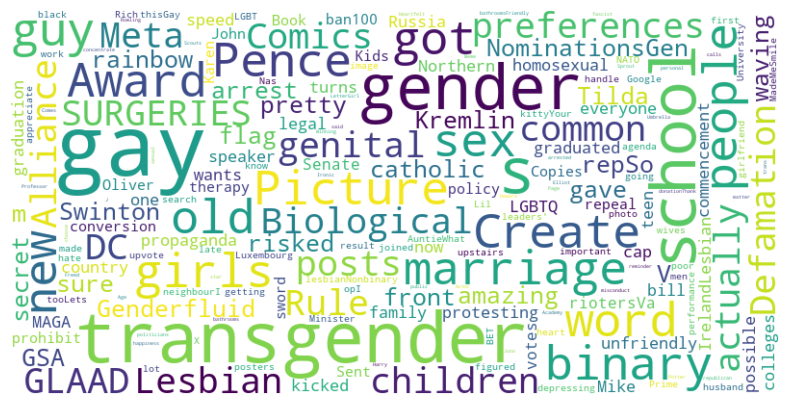

In [159]:
# Create the word cloud - Cluster 4
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_title[4])
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Cluster 4 - posts include :
- transgender, gender, gay, surgeries, policies
- Keywords (e.g. transgender, gender, gay, surgeries, policies etc)

<h2 style="text-align:center; background-color:#fdfbd4; color:black; padding:5px;"><b>  Part VI - Summary and Reflection </b></h2><a id="part-vi---summary"></a>

- NLP models provides insghts for understanding, classifying (/predicting) text data. 
- Unsupervised clustering models provide insights on patterns on text, but it can be hard to interpret.
- E.g. Sentence Transfer model + PCA + K-MEans Clustering can statistically distinguish the posts into five clear clusters.
- But it is hard to interpret what exact semantic meanings the model weight and how the cluster represent.
- Having said that, it provides some insights that there are hidden patterns across the posts.
- This data has its own charateristics and limitation.
- E.g. There are no demographic characteristics of post authors and commenters, and no locations showing where the posts and comments were created.

<br></br>

According to the official docuement, if multiple classification labels are available (`model.config.num_labels >= 2`), the pipeline will run a softmax. This post-processing pipeline saved model have set 3 labels, so it runs softmax, all probabilities of the three labels will sum up to 1. The label with the higest probability will be returned.

In [6]:
df['Title'][0]

'My parents chose to not attend their only daughter’s wedding and I couldn’t be happier. Sucks to be them!'

In [13]:
result_1 = pipe(df['Title'][0])
result_1

[{'label': 'negative', 'score': 0.5455582737922668}]

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Title                   150 non-null    object 
 1   Author                  137 non-null    object 
 2   Subreddit               150 non-null    object 
 3   Score                   150 non-null    int64  
 4   Content                 25 non-null     object 
 5   Number of Comments      150 non-null    int64  
 6   Upvote ratio            150 non-null    float64
 7   Post id                 150 non-null    object 
 8   Flair                   83 non-null     object 
 9   Permalink               150 non-null    object 
 10  URL                     150 non-null    object 
 11  Creation Time Readable  150 non-null    object 
 12  Year                    150 non-null    int64  
 13  Month                   150 non-null    int64  
 14  Date                    150 non-null    in

In [84]:
# Creat a Post list containing each title and its content(if content is str, not other format(image/video/nan)
post_list = []
for t, c in zip(df['Title'], df['Content']):
    if isinstance(c, str):                       # if content is a str, then add content and title into the post list 
        title_content = c + t
        post_list.append(title_content[:514])
    else:                                        # if content is not a str, then only add title into the post list
        post_list.append(t)

In [86]:
post_list

['My parents chose to not attend their only daughter’s wedding and I couldn’t be happier. Sucks to be them!',
 'My Mum allowed me to put any flag on my wardrobe doors except for the Pride Flag. So, 241 flags later...',
 'Love David Bowie',
 "North Dakota's first openly lesbian official defends her right to have the Pride flag flown in the city",
 "Magic Johnson's son",
 '"best friend"',
 'This month I reached 4 years of being on estrogen :) happy pride month everyone !!',
 '"The lack of Boomer LGBTQ+ People"',
 'It’s sad, but true…',
 'Best Grandad ever',
 'First, for a little background I need to tell you about myself. I look like a biker, long hair, loads of tattoos, spent too much time in the gym. I was in martial as classes five hours a day, five days a week from the time I was 4 until I was 16. Needless to say that guided my early career path, boxing, pro wrestling, MMA, bouncer, bodyguard, law enforcement. If there was a job that probably required you to punch another person m th

In [280]:
df['title and content'] = post_list
df.head(2)

Title     Author Subreddit  \
0  My parents chose to not attend their only daug...  isabeljdt      lgbt   
1  My Mum allowed me to put any flag on my wardro...   Chernyat      lgbt   

   Score Content  Number of Comments  Upvote ratio Post id         Flair  \
0  95160     NaN                1320          0.85  ewt93j           NaN   
1  54450     NaN                1567          0.82  q97h86  Art/Creative   

                                           Permalink  \
0  /r/lgbt/comments/ewt93j/my_parents_chose_to_no...   
1  /r/lgbt/comments/q97h86/my_mum_allowed_me_to_p...   

                                   URL Creation Time Readable  Year  Month  \
0  https://i.redd.it/4wxvw0ivx5e41.jpg    2020-01-31 19:09:53  2020      1   
1  https://i.redd.it/9834u49jprt71.jpg    2021-10-16 07:50:56  2021     10   

   Date  Hour Top Emotion                          Top Three Emotions  \
0    31    19     sadness  ['sadness', 'disappointment', 'annoyance']   
1    16     7     neutral      ['neutral', 'approval', 'realization']   

  sentiment label                                  title and content  
0        negative  My parents chose to not attend their only daug...  
1         neutral  My Mum allowed me to put any flag on my wardro...

In [88]:
len(post_list)

150

In [90]:
result_list =[]
for post in post_list:
    result_each_post = pipe(post)
    result_list.append(result_each_post)

In [92]:
result_list

[[{'label': 'negative', 'score': 0.5455582737922668}],
 [{'label': 'neutral', 'score': 0.7093885540962219}],
 [{'label': 'positive', 'score': 0.9144534468650818}],
 [{'label': 'neutral', 'score': 0.6843898892402649}],
 [{'label': 'neutral', 'score': 0.8863403797149658}],
 [{'label': 'neutral', 'score': 0.7573588490486145}],
 [{'label': 'positive', 'score': 0.9852771162986755}],
 [{'label': 'negative', 'score': 0.6549601554870605}],
 [{'label': 'negative', 'score': 0.8054929375648499}],
 [{'label': 'positive', 'score': 0.9658681154251099}],
 [{'label': 'neutral', 'score': 0.702796995639801}],
 [{'label': 'neutral', 'score': 0.5563858151435852}],
 [{'label': 'negative', 'score': 0.5876525044441223}],
 [{'label': 'neutral', 'score': 0.7090070247650146}],
 [{'label': 'negative', 'score': 0.8451038599014282}],
 [{'label': 'positive', 'score': 0.700193464756012}],
 [{'label': 'neutral', 'score': 0.569876492023468}],
 [{'label': 'negative', 'score': 0.862803041934967}],
 [{'label': 'neutral',

In [150]:
sentiment_label = []
sentiment_score = []
for result in result_list:
    for item in result:
        sentiment_label.append(item['label'])   # extract items of the specific key in the dict
        sentiment_score.append(item['score'])

In [152]:
sentiment_label

['negative',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'negative',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'positive',
 'neutral',
 'negative',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'neutral',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'neutral',
 'positive',
 'positive',
 'negative',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'negative',
 'neutral',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',


In [158]:
df_post_sentiment = df[['Title','Post id']].copy()
df_post_sentiment['sentiment label'] = sentiment_label
df_post_sentiment['sentiment score'] = sentiment_score
df_post_sentiment

Title  Post id  \
0    My parents chose to not attend their only daug...   ewt93j   
1    My Mum allowed me to put any flag on my wardro...   q97h86   
2                                     Love David Bowie   kv7nao   
3    North Dakota's first openly lesbian official d...   jswaqm   
4                                  Magic Johnson's son   6f148h   
..                                                 ...      ...   
145  bought my first dress today! felt so elated i ...   jq4rg7   
146             If you are queer and scared in the US   1gm7gru   
147        Ironic Meme -- beware the new gender binary  19b7bs6   
148          Pole dancing in one of my first dresses 🥰   ry4aua   
149  Hi all, I’m Erl! I’m a cis-woman, masculine-of...   i474qr   

    sentiment label  sentiment score  
0          negative         0.545558  
1           neutral         0.709389  
2          positive         0.914453  
3           neutral         0.684390  
4           neutral         0.886340  
..              ...              ...  
145        positive         0.989947  
146        negative         0.769380  
147        negative         0.775353  
148        positive         0.965979  
149        positive         0.980826  

[150 rows x 4 columns]

In [166]:
df_post_sentiment.sort_values(by='sentiment score')

Title  Post id  \
142       Elliot Page, about brought tears to the eyes   k4ta2t   
77                  Wish all guys were like this tbh 😂   gndz1x   
120  I was getting a lot of hate for this in r/Made...   aneivd   
89                                Your Rich Gay Auntie  1f8h8er   
55   “Traditional things I won’t be having in my we...   s2gnwc   
..                                                 ...      ...   
91   Love the Rosa representation on Brooklyn 99 ❤ ...   j1c4mz   
31   [Coming Out] Just came out to my grandma, shes...   as1yav   
51                   Happy International Lesbian Day 💕   q4hqwx   
145  bought my first dress today! felt so elated i ...   jq4rg7   
94   A very cute request came in to my Coldstone to...   kr8kga   

    sentiment label  sentiment score  
142        positive         0.364484  
77          neutral         0.429414  
120        negative         0.450379  
89         negative         0.489014  
55         positive         0.491810  
..              ...              ...  
91         positive         0.986030  
31         positive         0.986446  
51         positive         0.987070  
145        positive         0.989947  
94         positive         0.990578  

[150 rows x 4 columns]

In [194]:
df['sentiment label'] = sentiment_label
df.head(2)

Title     Author Subreddit  \
0  My parents chose to not attend their only daug...  isabeljdt      lgbt   
1  My Mum allowed me to put any flag on my wardro...   Chernyat      lgbt   

   Score Content  Number of Comments  Upvote ratio Post id         Flair  \
0  95160     NaN                1320          0.85  ewt93j           NaN   
1  54450     NaN                1567          0.82  q97h86  Art/Creative   

                                           Permalink  \
0  /r/lgbt/comments/ewt93j/my_parents_chose_to_no...   
1  /r/lgbt/comments/q97h86/my_mum_allowed_me_to_p...   

                                   URL Creation Time Readable  Year  Month  \
0  https://i.redd.it/4wxvw0ivx5e41.jpg    2020-01-31 19:09:53  2020      1   
1  https://i.redd.it/9834u49jprt71.jpg    2021-10-16 07:50:56  2021     10   

   Date  Hour Top Emotion                          Top Three Emotions  \
0    31    19     sadness  ['sadness', 'disappointment', 'annoyance']   
1    16     7     neutral      ['neutral', 'approval', 'realization']   

  sentiment label  
0        negative  
1         neutral

### Save Dataframe as csv file

In [284]:
df.to_csv('reddict_posts_combined_title_content_sentiment.csv',index=False)

### Check again, if it is softmax

In [179]:
df['Title'][142]

'Elliot Page, about brought tears to the eyes'

In [168]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
inputs = tokenizer(df['Title'][142], return_tensors="pt")
logits = model(**inputs).logits
print(logits)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tensor([[-0.2740, -0.0539, -0.0207]], grad_fn=<AddmmBackward0>)


In [170]:
import torch
softmax = torch.nn.Softmax(dim=1)
probabilities = softmax(logits)

print(probabilities)

tensor([[0.2829, 0.3526, 0.3645]], grad_fn=<SoftmaxBackward0>)


In [175]:
0.2829+ 0.3526+0.3645

1.0

### Aanlysis

<Axes: xlabel='count', ylabel='sentiment label'>

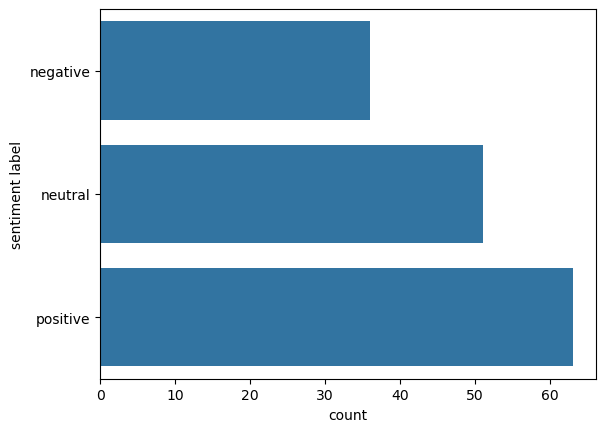

In [234]:
sns.countplot(df['sentiment label'])

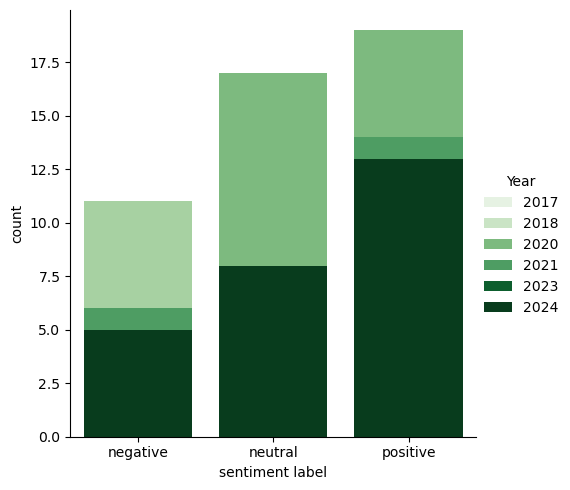

In [252]:
sns.catplot(df, kind='count', x='sentiment label', hue='Year', dodge=False, palette='Greens')

In [290]:
df.head(2)

Title     Author Subreddit  \
0  My parents chose to not attend their only daug...  isabeljdt      lgbt   
1  My Mum allowed me to put any flag on my wardro...   Chernyat      lgbt   

   Score Content  Number of Comments  Upvote ratio Post id         Flair  \
0  95160     NaN                1320          0.85  ewt93j           NaN   
1  54450     NaN                1567          0.82  q97h86  Art/Creative   

                                           Permalink  \
0  /r/lgbt/comments/ewt93j/my_parents_chose_to_no...   
1  /r/lgbt/comments/q97h86/my_mum_allowed_me_to_p...   

                                   URL Creation Time Readable  Year  Month  \
0  https://i.redd.it/4wxvw0ivx5e41.jpg    2020-01-31 19:09:53  2020      1   
1  https://i.redd.it/9834u49jprt71.jpg    2021-10-16 07:50:56  2021     10   

   Date  Hour Top Emotion                          Top Three Emotions  \
0    31    19     sadness  ['sadness', 'disappointment', 'annoyance']   
1    16     7     neutral      ['neutral', 'approval', 'realization']   

  sentiment label                                  title and content  
0        negative  My parents chose to not attend their only daug...  
1         neutral  My Mum allowed me to put any flag on my wardro...

In [300]:
text_postive = ' '.join(postive_post['title and content'])
text_negative = ' '.join(negative_post['title and content'])
text_neutral =  ' '.join(neutral_post['title and content'])

In [302]:
text_postive

'Love David Bowie This month I reached 4 years of being on estrogen :) happy pride month everyone !! Best Grandad ever Wow, his has taken some wild turns. I came here hoping for a little advice, and didn\'t even really expect much of a response. \n\nThen someone reposted on Twitter, and I will be forever grateful. It exploded, thousands of reposts, tens of thousands of likes. It was commented on in several languages. It spread far enough and wide enough that my son did in fact read it. \n\nThis morning I got a text "Sneak Level 0 Dad, and your Anon needs work." The rest of the day has been well...heart warming and hilarious. \n\nApp It was as our first time kinda cosplaying and it was so fun :,)My Boyfriend and I as Hulking and Wiccan for NYCC Artists: Travis Moore, Belén Ortega, Ricardo Lopez Ortiz, Miguel Mendonça, Riley Rossmo, Serg Acuña, and David TalaskiTim Drake and Bernard Dowd appreciation because I love them and I miss them ❤️ Another great Fanart panel by @thefuzzyaya (Twitt

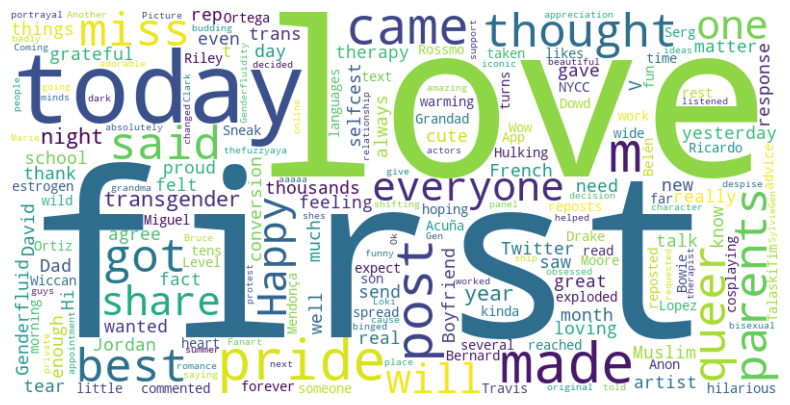

In [304]:
# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_postive)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()